In [4]:
##准备包
import numpy as np
import pandas as pd
import json
#import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
##导入数据，查看数据内容

In [6]:
credits=pd.read_csv('tmdb_5000_credits.csv',sep=',')

In [7]:
movies=pd.read_csv('tmdb_5000_movies.csv',sep=',')

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
#删去重复列
del credits['title']

In [13]:
#合并两张表
total = pd.merge(movies,credits,left_on='id',right_on='movie_id',how='left')

In [14]:
##数据清洗

In [15]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
total.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [17]:
#缺失值处理

In [18]:
total.release_date=total.release_date.fillna('2014-06-01')

In [19]:
total[total.runtime.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,370980,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,459488,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [20]:
total.runtime=total.runtime.fillna(94,limit=1)

In [21]:
total.runtime=total.runtime.fillna(240,limit=1)

In [22]:
#异常值处理-用平均值代替

In [23]:
total['budget']=total['budget'].replace(0,total['budget'].mean())

In [24]:
total['revenue']=total['revenue'].replace(0,total['revenue'].mean())

In [25]:
total['vote_average']=total['vote_average'].replace(0,total['vote_average'].mean())

In [26]:
total['vote_count']=total['vote_count'].replace(0,total['vote_count'].mean())

In [27]:
#转化日期

In [28]:
total.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [29]:
total.release_date = pd.to_datetime(total.release_date,format='%Y-%M-%d',errors='coerce').dt.year

In [30]:
total.release_date.head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_date, dtype: int64

In [31]:
#将字符串还有|进行处理

In [32]:
json_column=['genres','keywords','production_companies','production_countries']
for column in json_column:
    total[column]=total[column].map(json.loads)
def getname(x):
    list=[]
    for i in x:
        list.append(i['name'])
    return '|'.join(list)
for column in json_column:
    total[column]=total[column].map(getname)
total.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [33]:
##数据分析及可视化

In [34]:
#用genre_df存放所有电影类型
genre_set=set()
for x in total['genres']:
    genre_set.update(x.split('|'))
genre_set.discard('')
genre_df=pd.DataFrame()
for genre in genre_set:
    genre_df[genre]=total['genres'].str.contains(genre).map(lambda x:1 if x else 0)

In [35]:
genre_df.head(5)

,Family,Foreign,Music,Documentary,Adventure,Animation,Crime,Thriller,Western,History,War,Drama,Mystery,Fantasy,Horror,Action,Romance,TV Movie,Comedy,Science Fiction
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [36]:
#用genre_by_year存放各年份的不同电影类型的电影总数
genre_df['release_date']=total['release_date']
genre_by_year=genre_df.groupby('release_date').sum()
genre_by_year.head()

,Family,Foreign,Music,Documentary,Adventure,Animation,Crime,Thriller,Western,History,War,Drama,Mystery,Fantasy,Horror,Action,Romance,TV Movie,Comedy,Science Fiction
release_date,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1929,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,2,0,0,0
1930,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


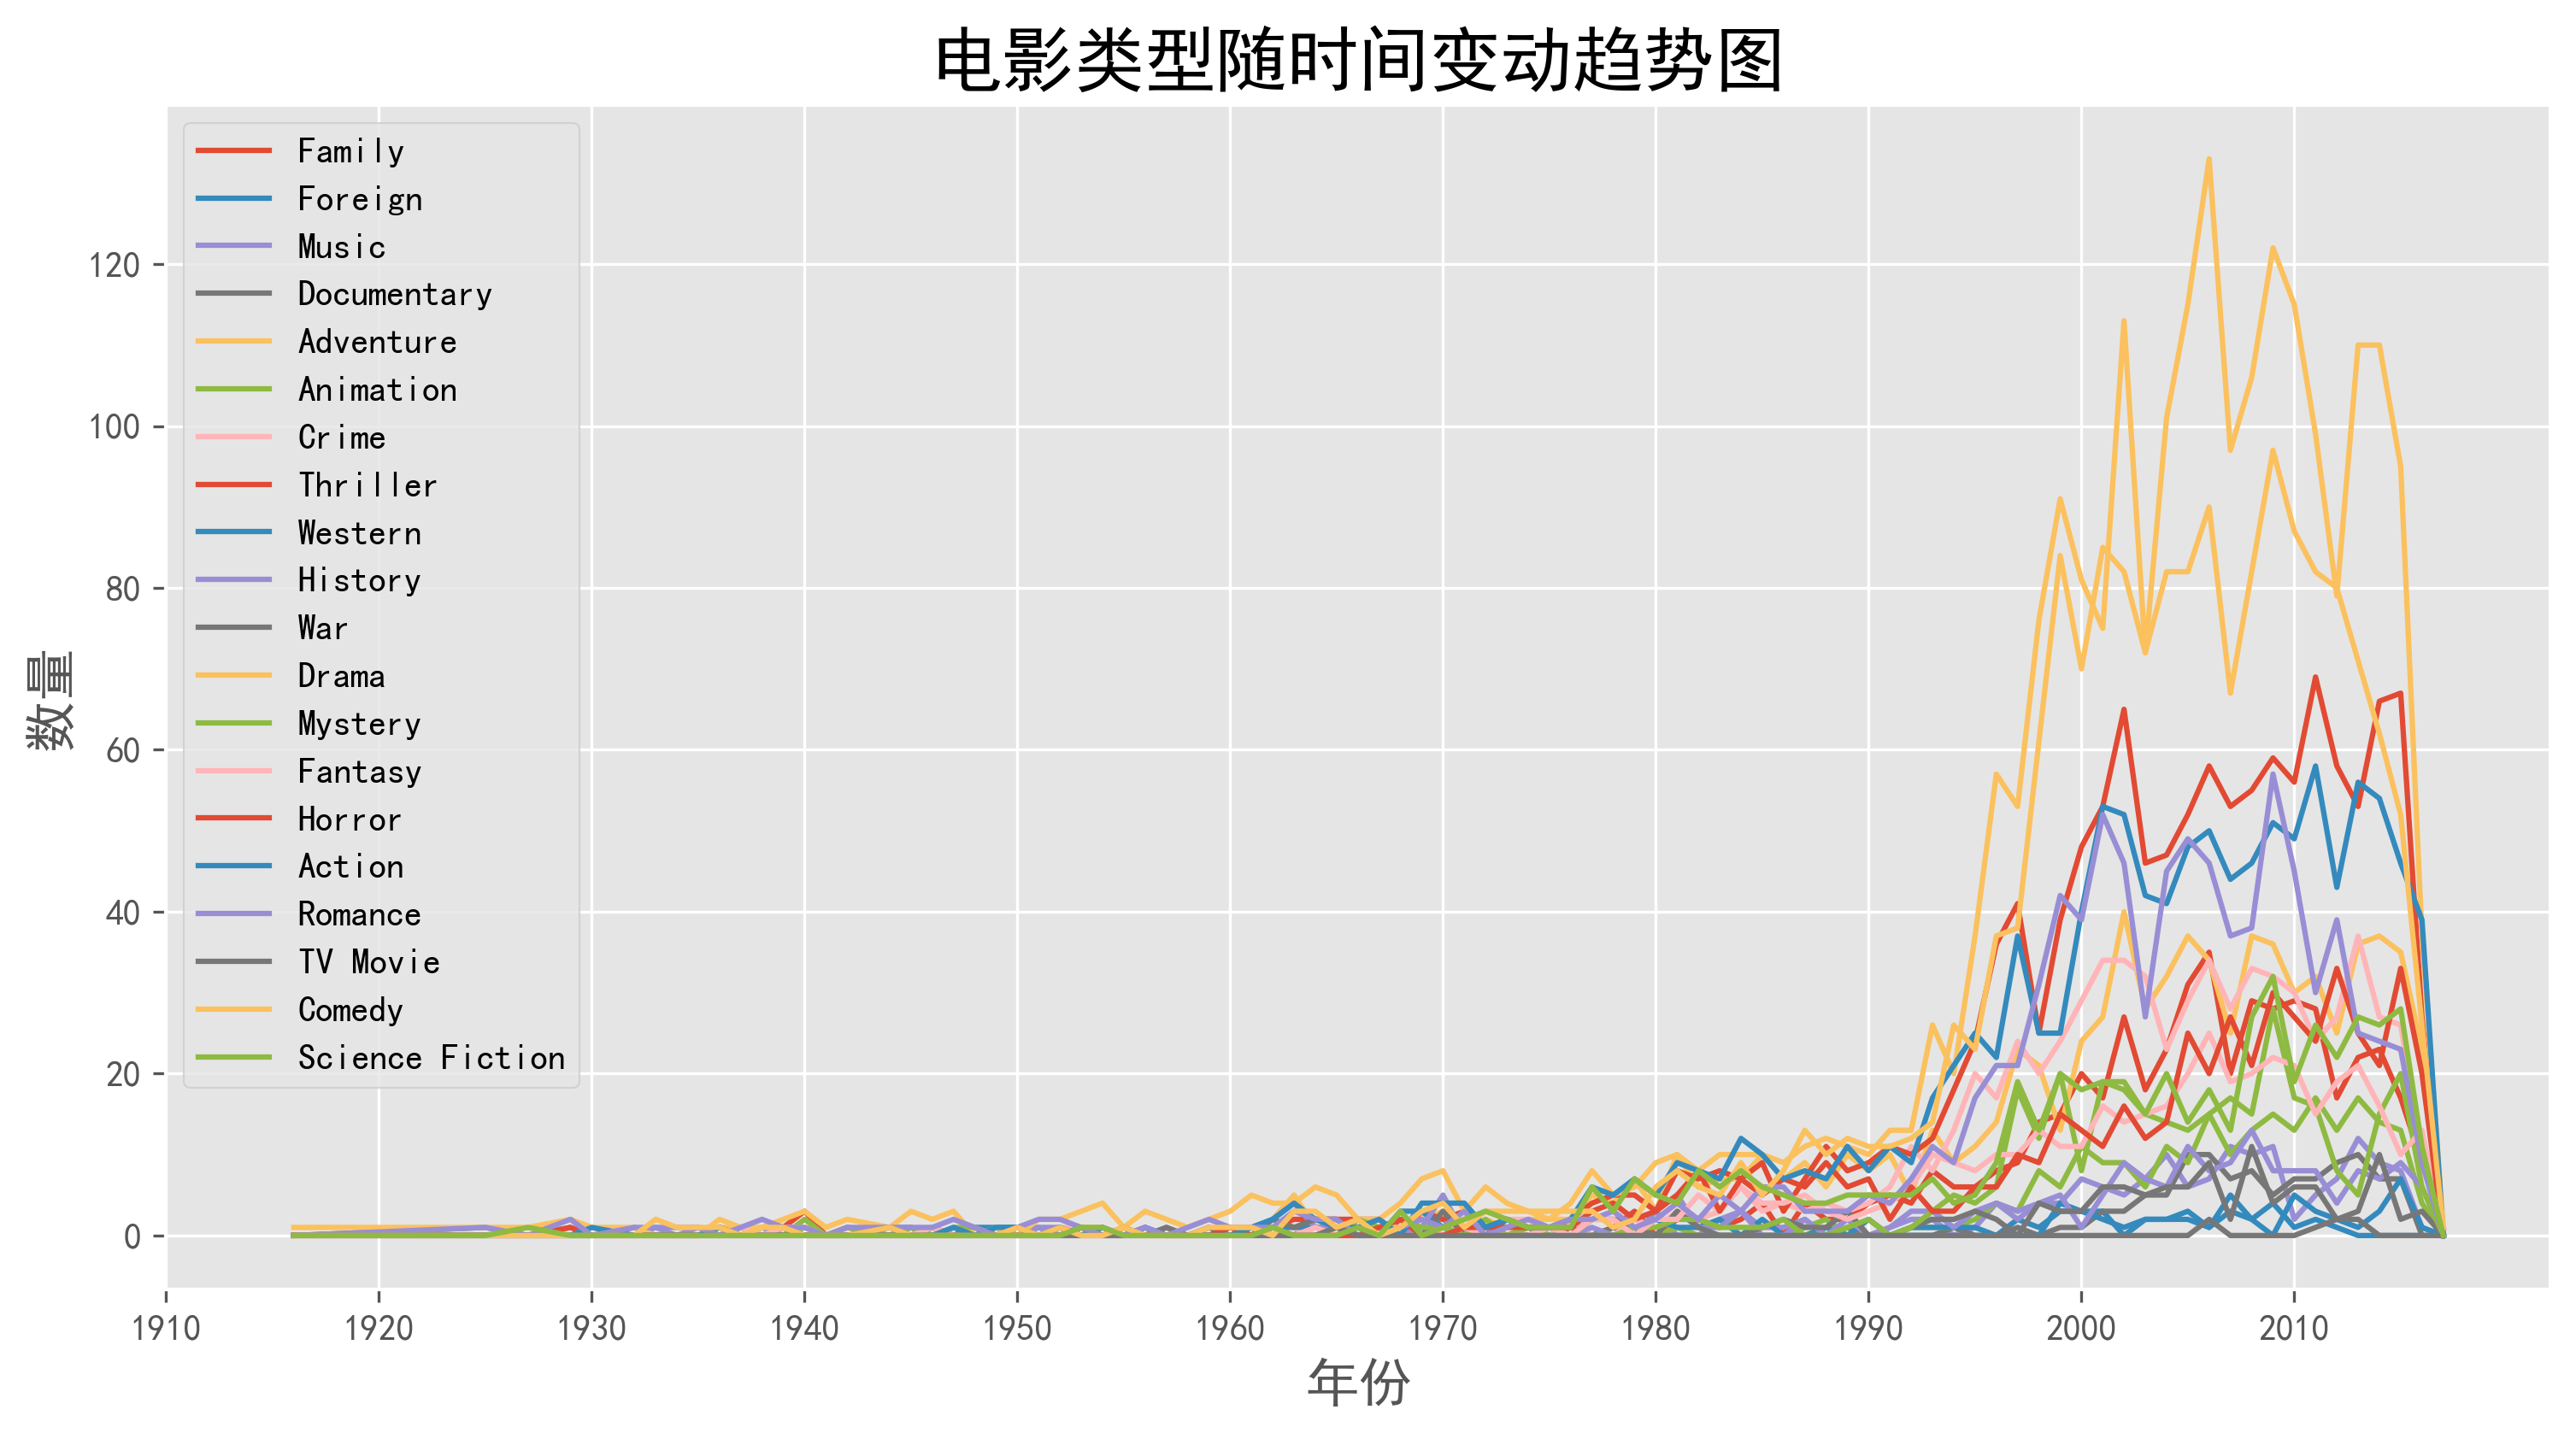

In [37]:
#绘图
plt.rcParams['font.sans-serif']=['SimHei']
fig=plt.figure(figsize=(12,6),dpi=300)
plt.style.use('ggplot')
plt.plot(genre_by_year,label=genre_by_year.columns)
plt.legend(genre_by_year)
plt.xticks(range(1910,2018,10))
plt.title('电影类型随时间变动趋势图',fontsize=20)
plt.xlabel('年份',fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.grid(True)
plt.savefig('picture/电影类型随时间变动趋势图.png',transparent=True)

In [38]:
#各类电影数量分布
genre_sum=genre_by_year.sum().sort_values(ascending=False)
genre_sum

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

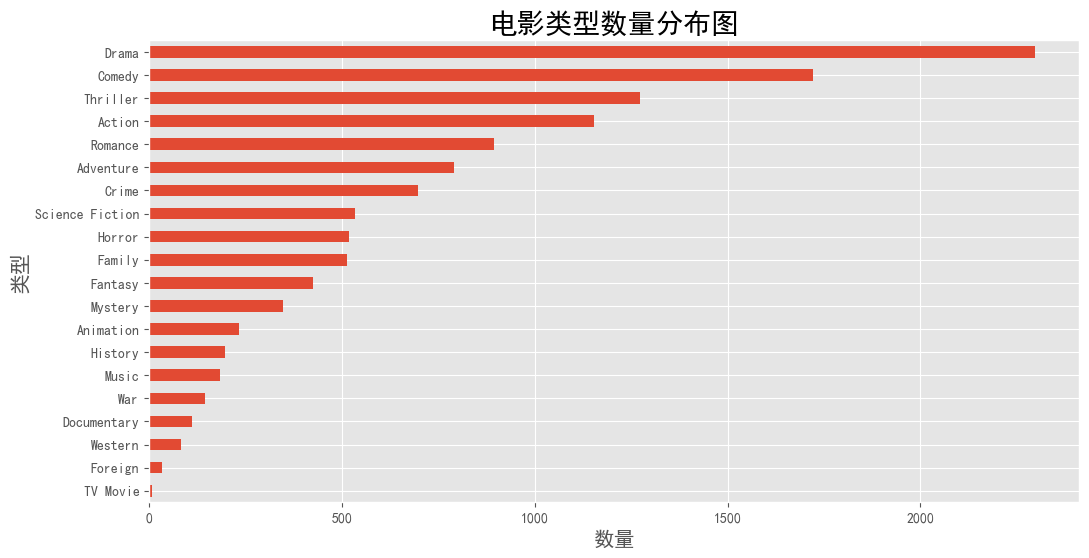

In [39]:
#绘制分布图
genre_sum.sort_values(ascending=True).plot.barh(label='genre',figsize=(12,6))
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.dpi']=500
plt.title('电影类型数量分布图',fontsize=20)
plt.xlabel('数量',fontsize=15)
plt.ylabel('类型',fontsize=15)
plt.savefig('picture/电影类型数量分布图.png',transparent=True)

In [40]:
#各类电影盈利情况
profit_df = pd.DataFrame()

total['profit']=total.revenue-total.budget
profit_df=pd.concat([genre_df.iloc[:,:-1],total.profit],axis=1)
profit_by_genre=pd.Series(index=genre_set)
for genre in genre_set:
    profit_by_genre[genre]=profit_df.groupby(genre,as_index=False).profit.mean().loc[1,'profit']
profit_by_genre

C:\Users\wxq\AppData\Local\Temp\ipykernel_12916\165069287.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  profit_by_genre=pd.Series(index=genre_set)


Family             1.268005e+08
Foreign            4.523971e+07
Music              5.346973e+07
Documentary        4.004004e+07
Adventure          1.516976e+08
Animation          1.711162e+08
Crime              5.287829e+07
Thriller           6.483279e+07
Western            3.456669e+07
History            4.267519e+07
War                5.902059e+07
Drama              5.188165e+07
Mystery            6.221033e+07
Fantasy            1.408738e+08
Horror             5.044035e+07
Action             1.014584e+08
Romance            5.942251e+07
TV Movie           6.295749e+07
Comedy             6.522191e+07
Science Fiction    1.120944e+08
dtype: float64

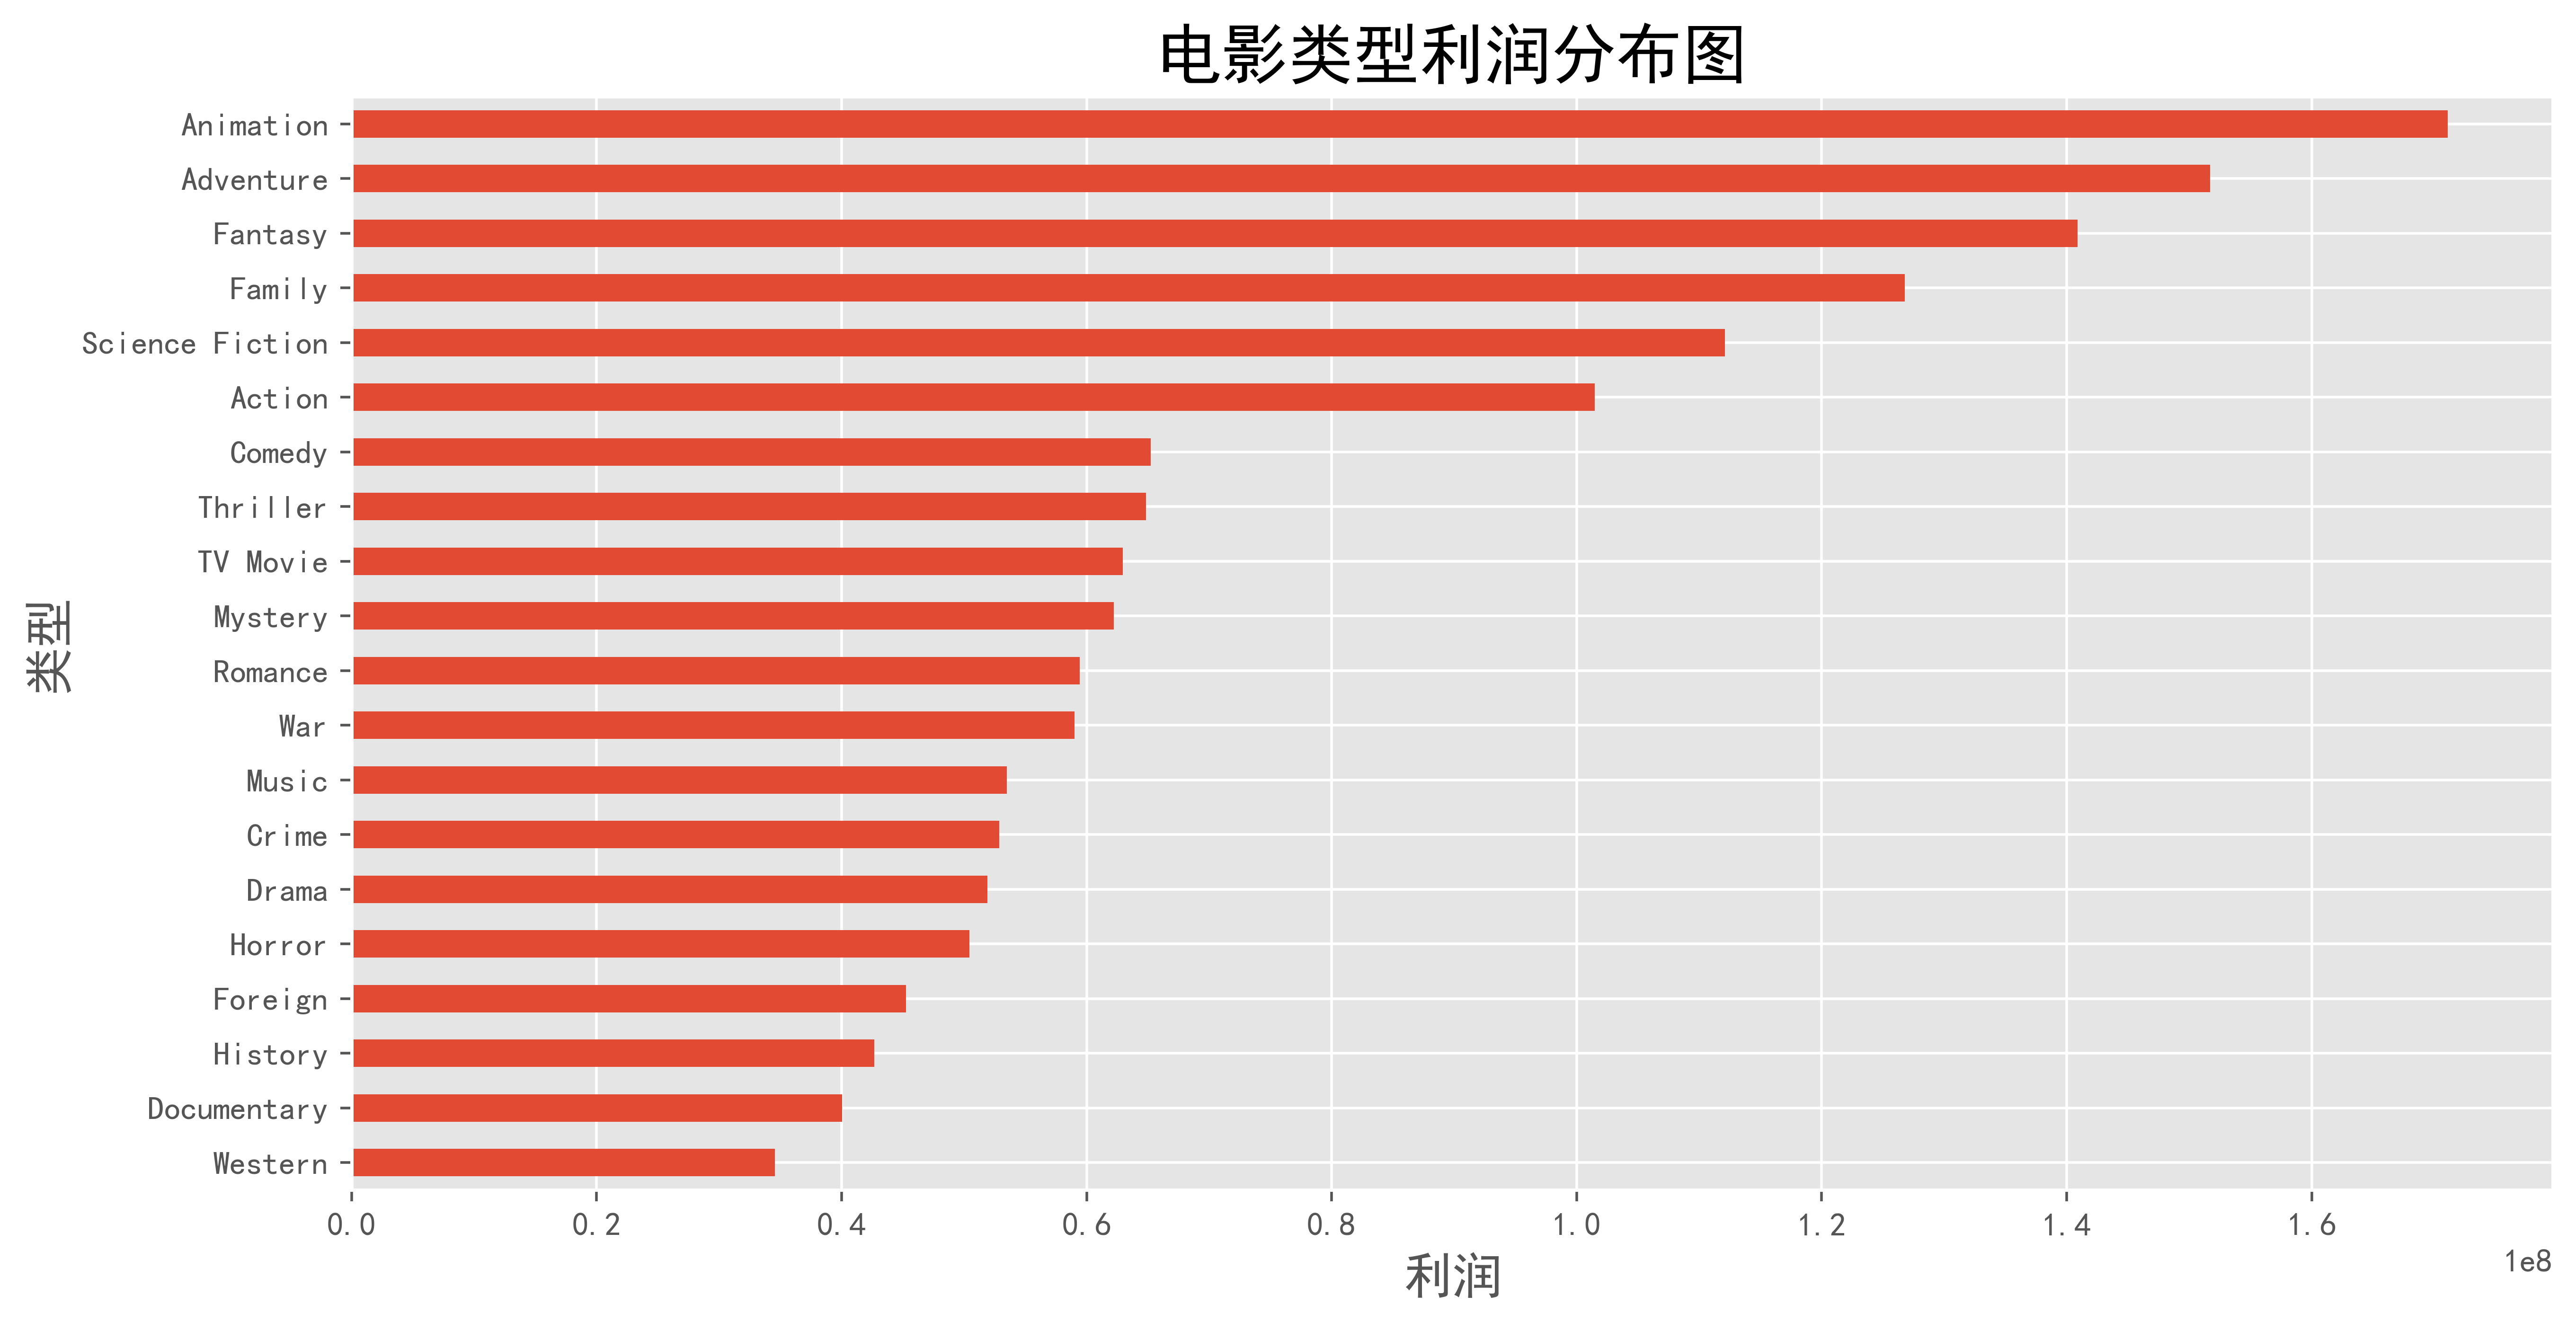

In [41]:
#绘图
profit_by_genre.sort_values().plot.barh(label='genre',figsize=(12,6))
plt.title('电影类型利润分布图',fontsize=20)
plt.xlabel('利润',fontsize=15)
plt.ylabel('类型',fontsize=15)
plt.savefig('picture/电影类型利润分布图.png',transparent=True)

In [42]:
#原创电影和改变电影的对比
original_recompose=pd.DataFrame()
original_recompose['type']=total.keywords.str.contains('based on novel').map(lambda x:1 if x else 0)
count_list=original_recompose.groupby('type').type.count()
original_recomposet=original_recompose['profit']=total.profit
original_recomposet=original_recompose['budget']=total.budget

In [43]:
#计算利润率
original_recompose=original_recompose.groupby('type').mean()
original_recompose['count']=count_list
original_recompose['profit_rate']=original_recompose.profit/original_recompose.budget
original_recompose.rename(index={0:'orginal',1:'recempose'},inplace=True)
original_recompose

,profit,budget,count,profit_rate
type,,,,
orginal,6.999245e+07,3.479967e+07,4606,2.011296
recempose,1.039367e+08,4.738957e+07,197,2.193239


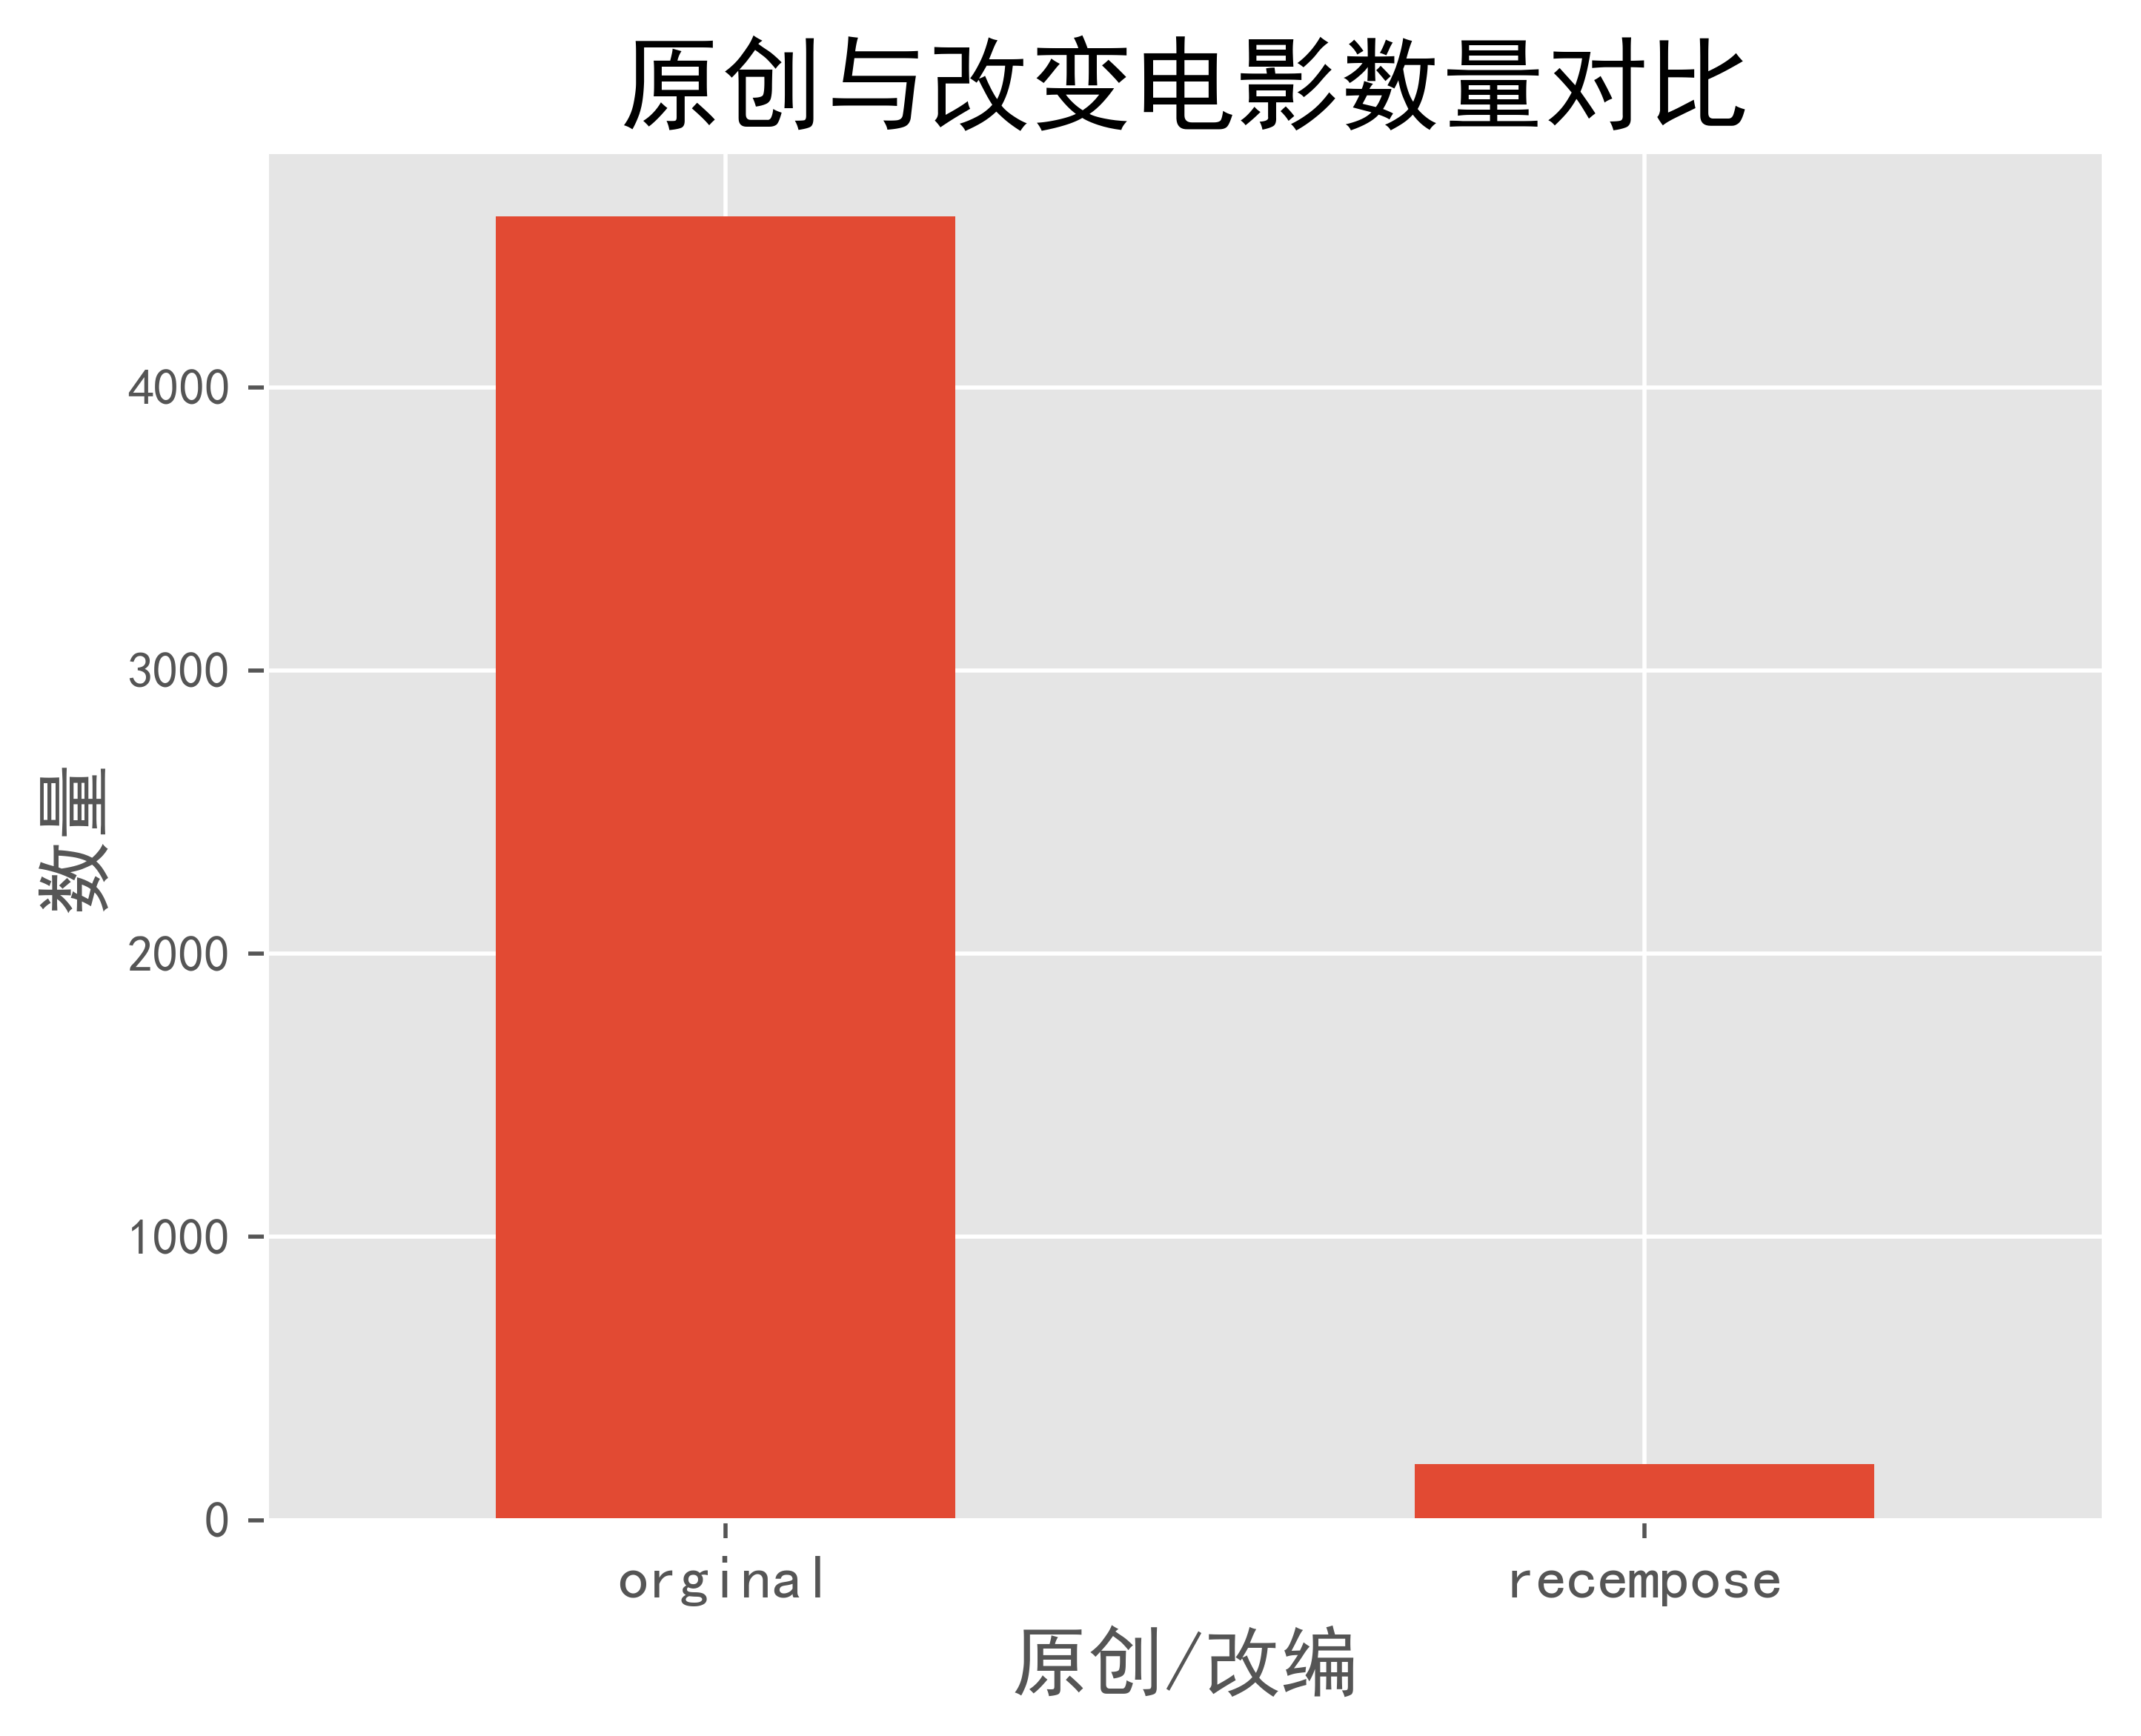

In [44]:
plt.figure()
original_recompose.loc[original_recompose.index,'count'].plot.bar()
plt.title('原创与改变电影数量对比',fontsize=20)
plt.xticks(fontsize=12,rotation=0)
plt.xlabel('原创/改编',fontsize=15)
plt.ylabel('数量',fontsize=15)
plt.savefig('picture/原创与改变电影数量对比.png',transparent=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


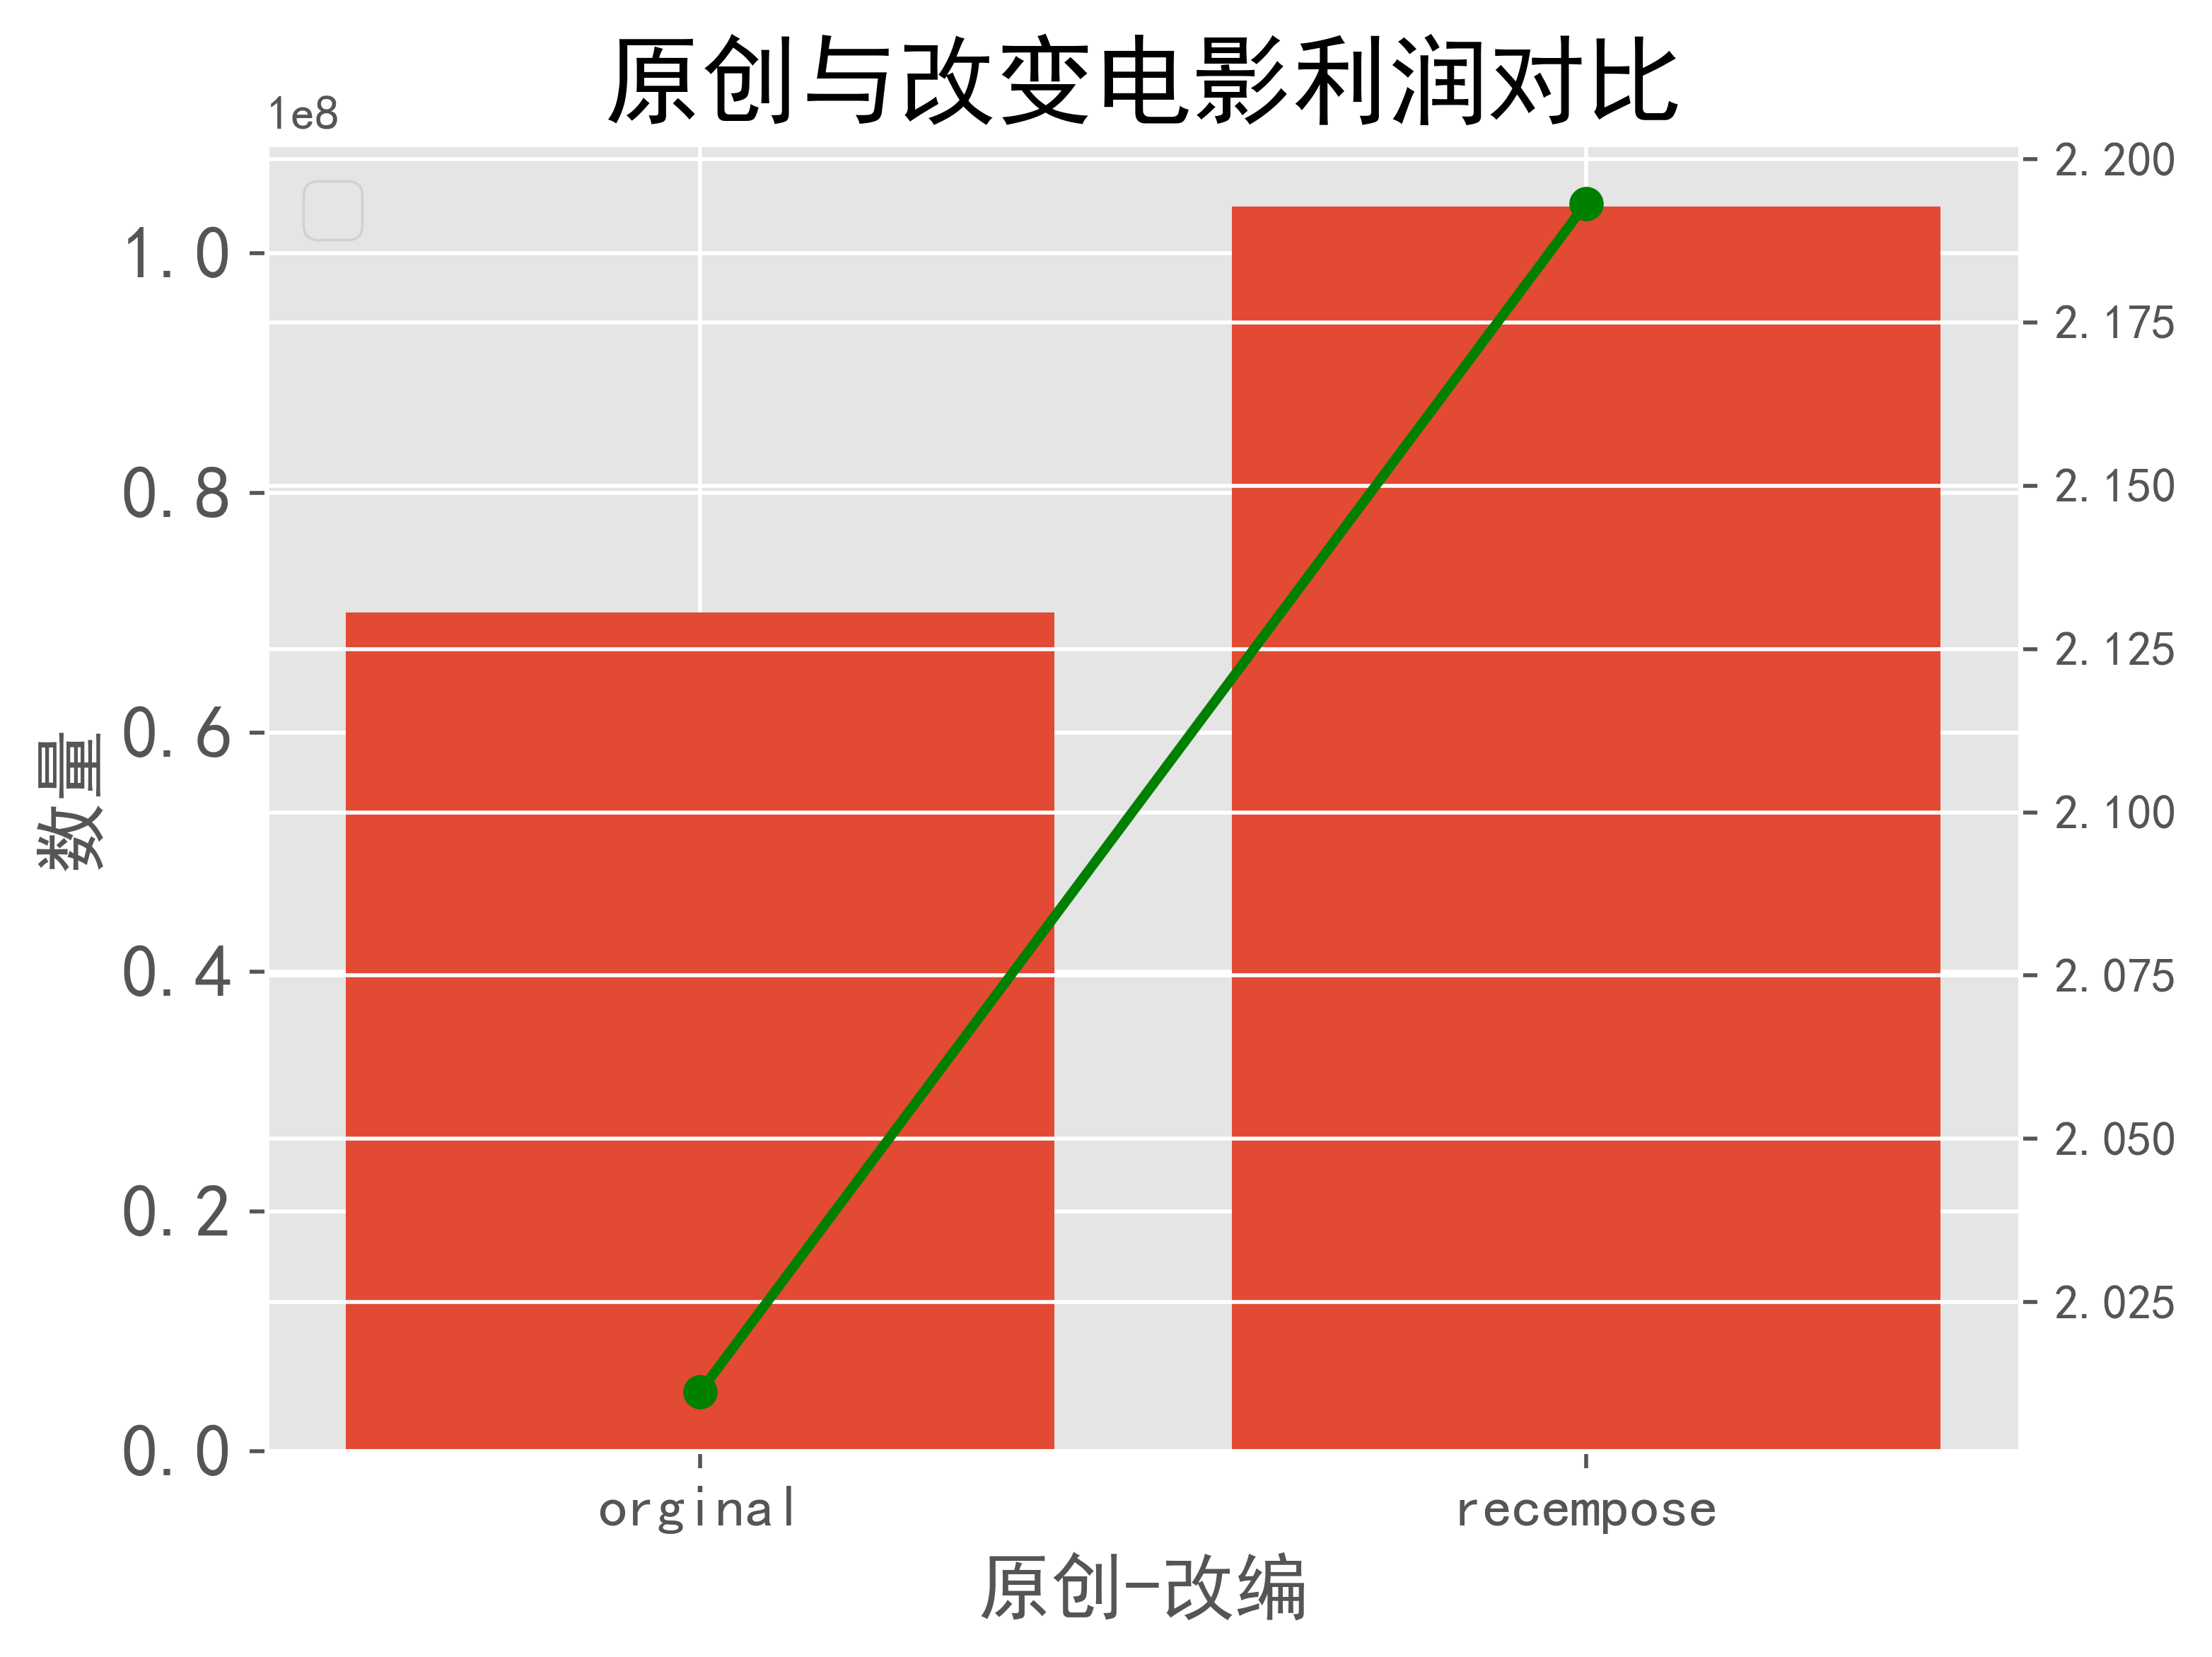

In [56]:
#利润及利率对比
#绘制利润柱状图
x=list(range(len(original_recompose.index)))#x为索引
xl=original_recompose.index #xL为索引实际值
fig=plt.figure()
ax1=fig.add_subplot(111)
plt.bar(x,original_recompose['profit'])
plt.xticks(x,xl,rotation=0,fontsize=12)
plt.yticks(fontsize=15)
ax1.set_title('原创与改变电影利润对比',fontsize=20)
ax1.set_xlabel('原创-改编',fontsize=15)
ax1.set_ylabel('数量',fontsize=15)
ax1.legend(loc=2,fontsize=15)
#绘制利润率折线图
import matplotlib.ticker as mtick
ax2=ax1.twinx()
ax2.plot(x,original_recompose['profit_rate'],'go-',lw=2)
plt.savefig('picture/原创与改变电影利润对比.png',transparent=True)

In [47]:
#电影产地分布
country_set=set()
for x in total['production_countries']:
    country_set.update(x.split('|'))
country_set.discard('')
country_df=pd.DataFrame()#储存电影数据
for country in country_set:
    country_df[country]=total['production_countries'].str.contains(country).map(lambda x:1 if x else 0)
country_df=country_df.sum().sort_values(ascending=False)
country_df

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Bhutan                         1
Monaco                         1
Tunisia                        1
Bosnia and Herzegovina         1
Egypt                          1
Length: 88, dtype: int64

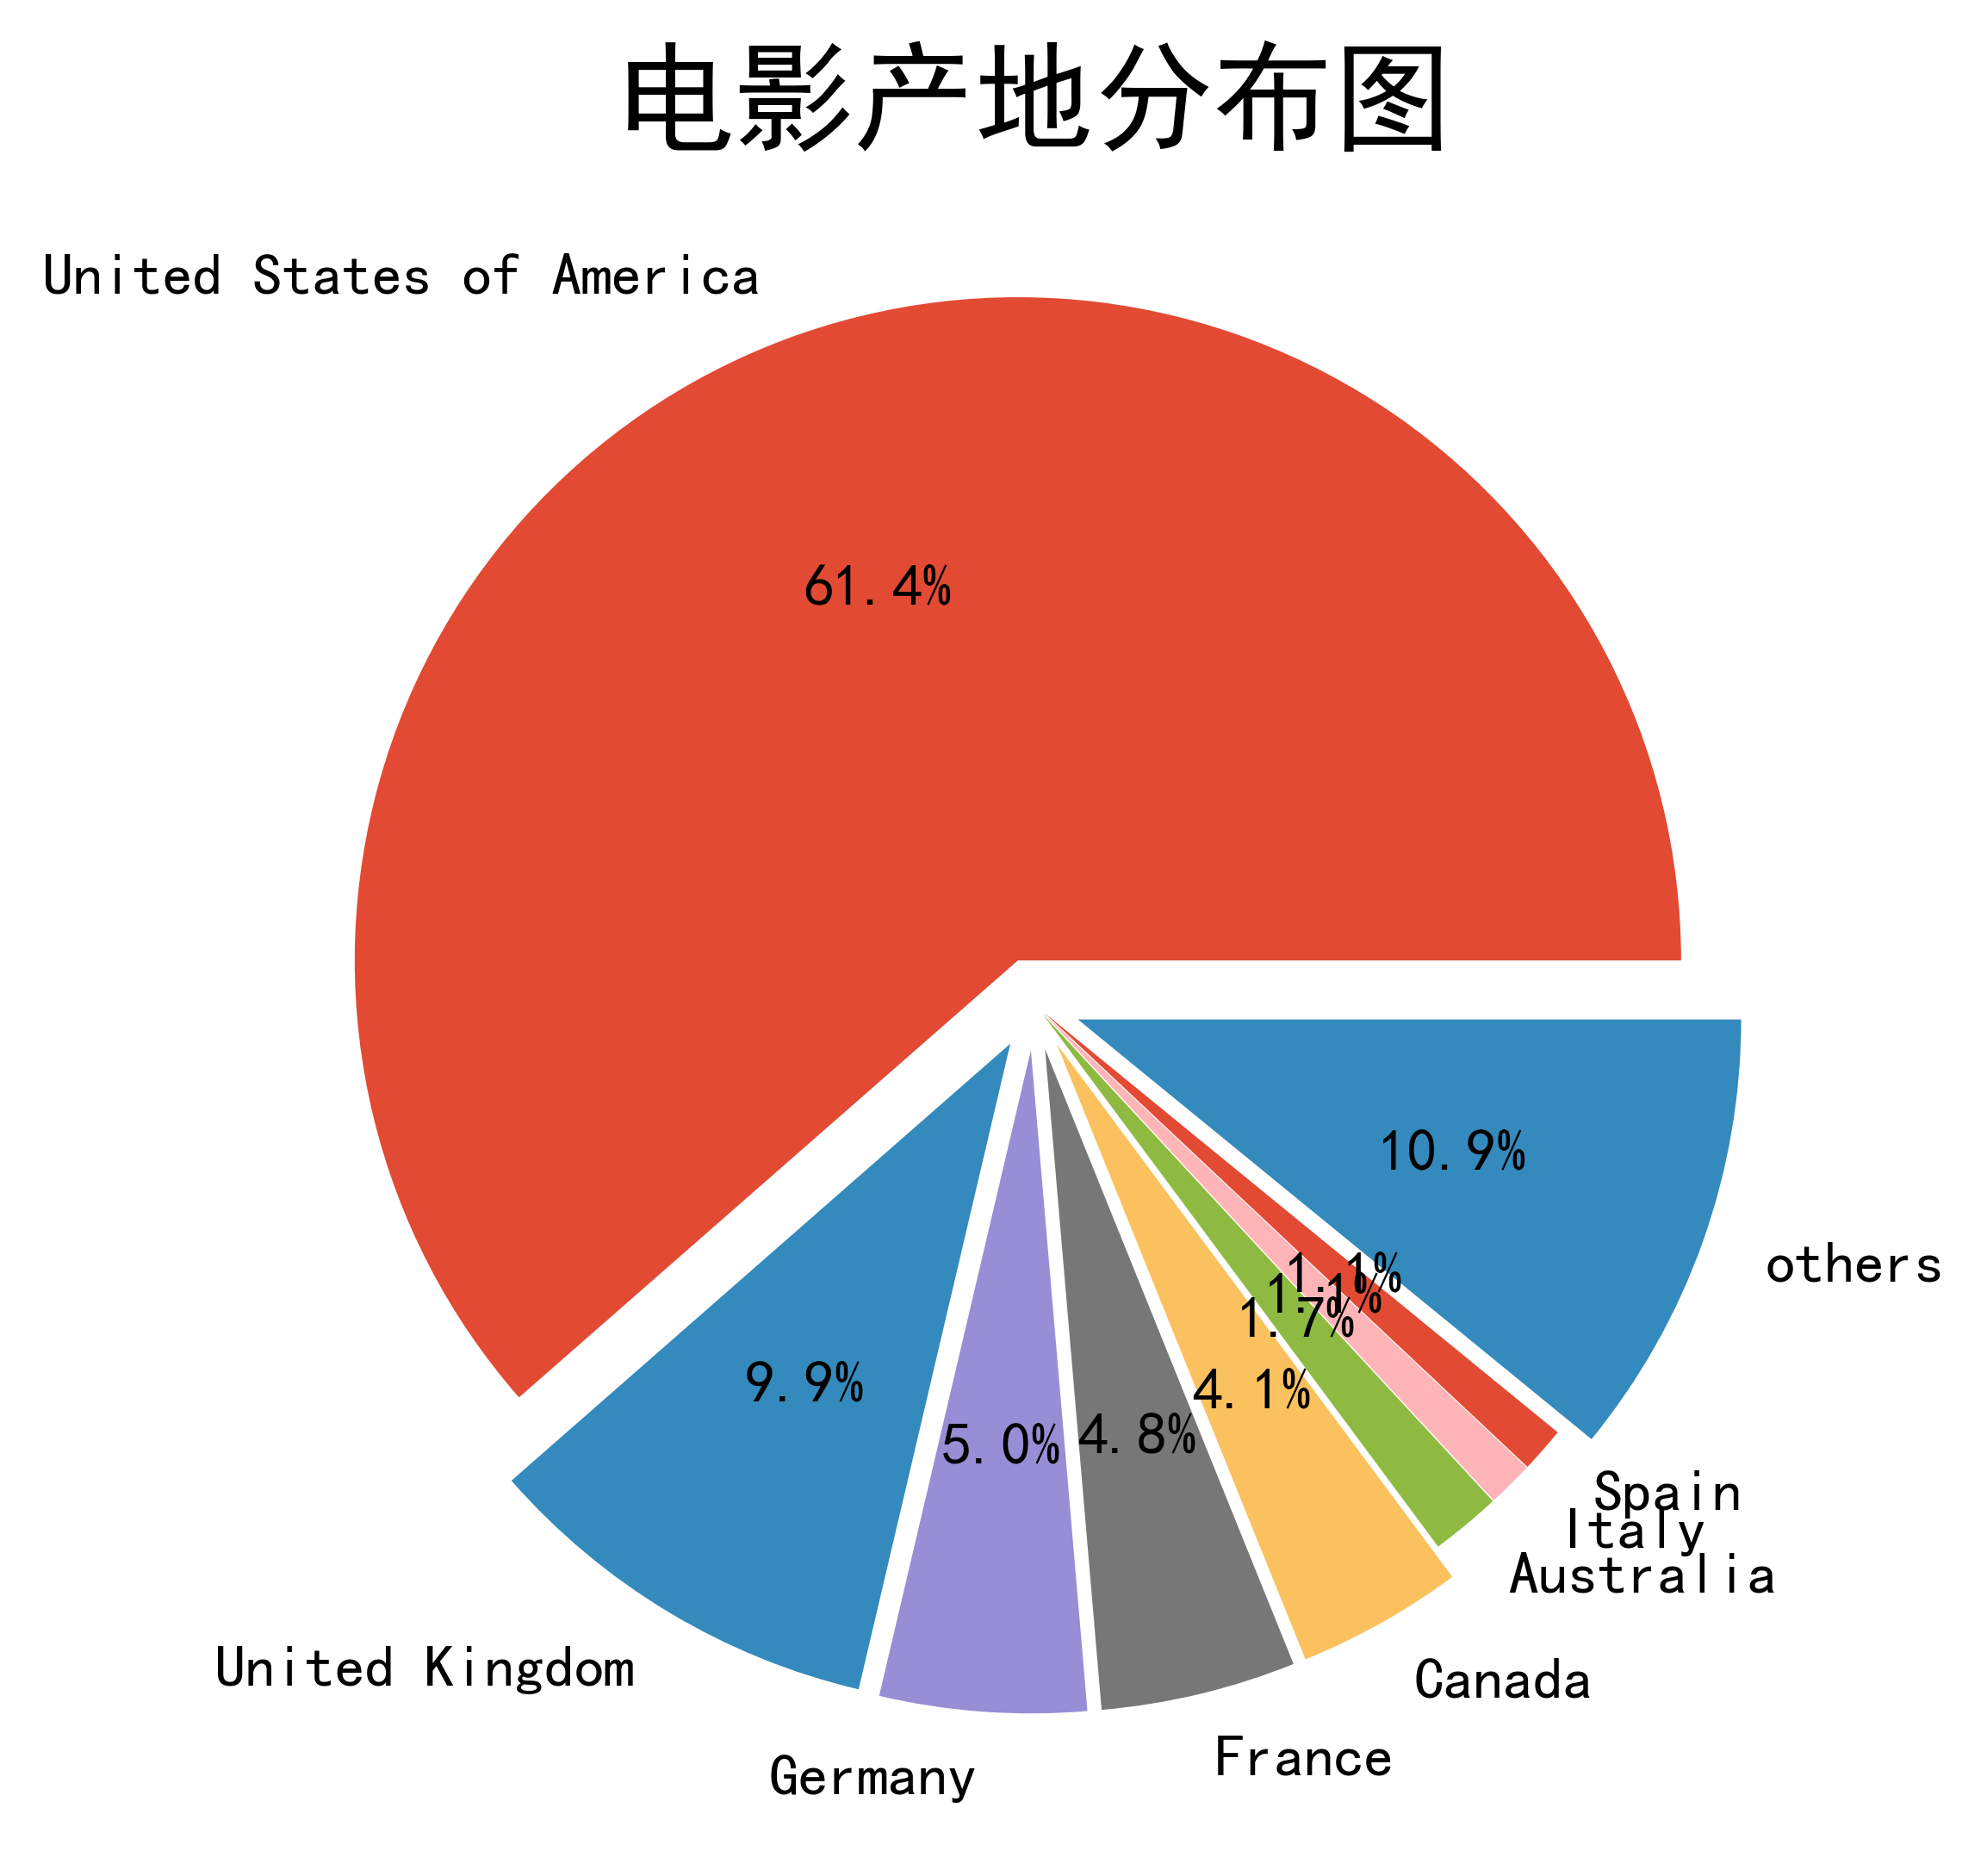

In [55]:
#绘制饼图
rate=country_df/country_df.sum()
others=0.01
rate1=rate[rate>=others]
rate1['others']=rate[rate<others].sum()#占比小于1%的放入others
explode=(rate1>=0.04)/20+0.02 #占比大于4%的向外延伸
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.dpi']=500
rate1.plot.pie(figsize=(5,5),autopct= '%1.1f%%',explode=explode,label='')
plt.title('电影产地分布图',fontsize=20)
plt.savefig('picture/电影产地分布图.png',transparent=True)

In [62]:
#观众的喜好与哪些因素有关
popular_genre_df=pd.DataFrame()
popular_genre_df=pd.concat([genre_df.iloc[:,:-1],total.popularity],axis=1)
list=[]
for genre in genre_set:
    list.append(popular_genre_df.groupby(genre,as_index=False).popularity.mean().loc[1,'popularity'])
popular_by_genre=pd.DataFrame(index=genre_set)
popular_by_genre['popular_mean']=list
popular_by_genre['popular_mean'].sort_values(ascending=False)

Adventure          39.268042
Animation          38.813439
Science Fiction    36.451806
Fantasy            36.387043
Action             30.940382
Family             27.832849
Mystery            24.586827
Thriller           24.460077
War                23.777289
Crime              22.853274
Horror             18.295915
Western            18.236279
Comedy             18.221001
Drama              17.764853
History            17.444839
Romance            15.962426
Music              13.101512
TV Movie            6.389415
Documentary         3.945724
Foreign             0.686787
Name: popular_mean, dtype: float64

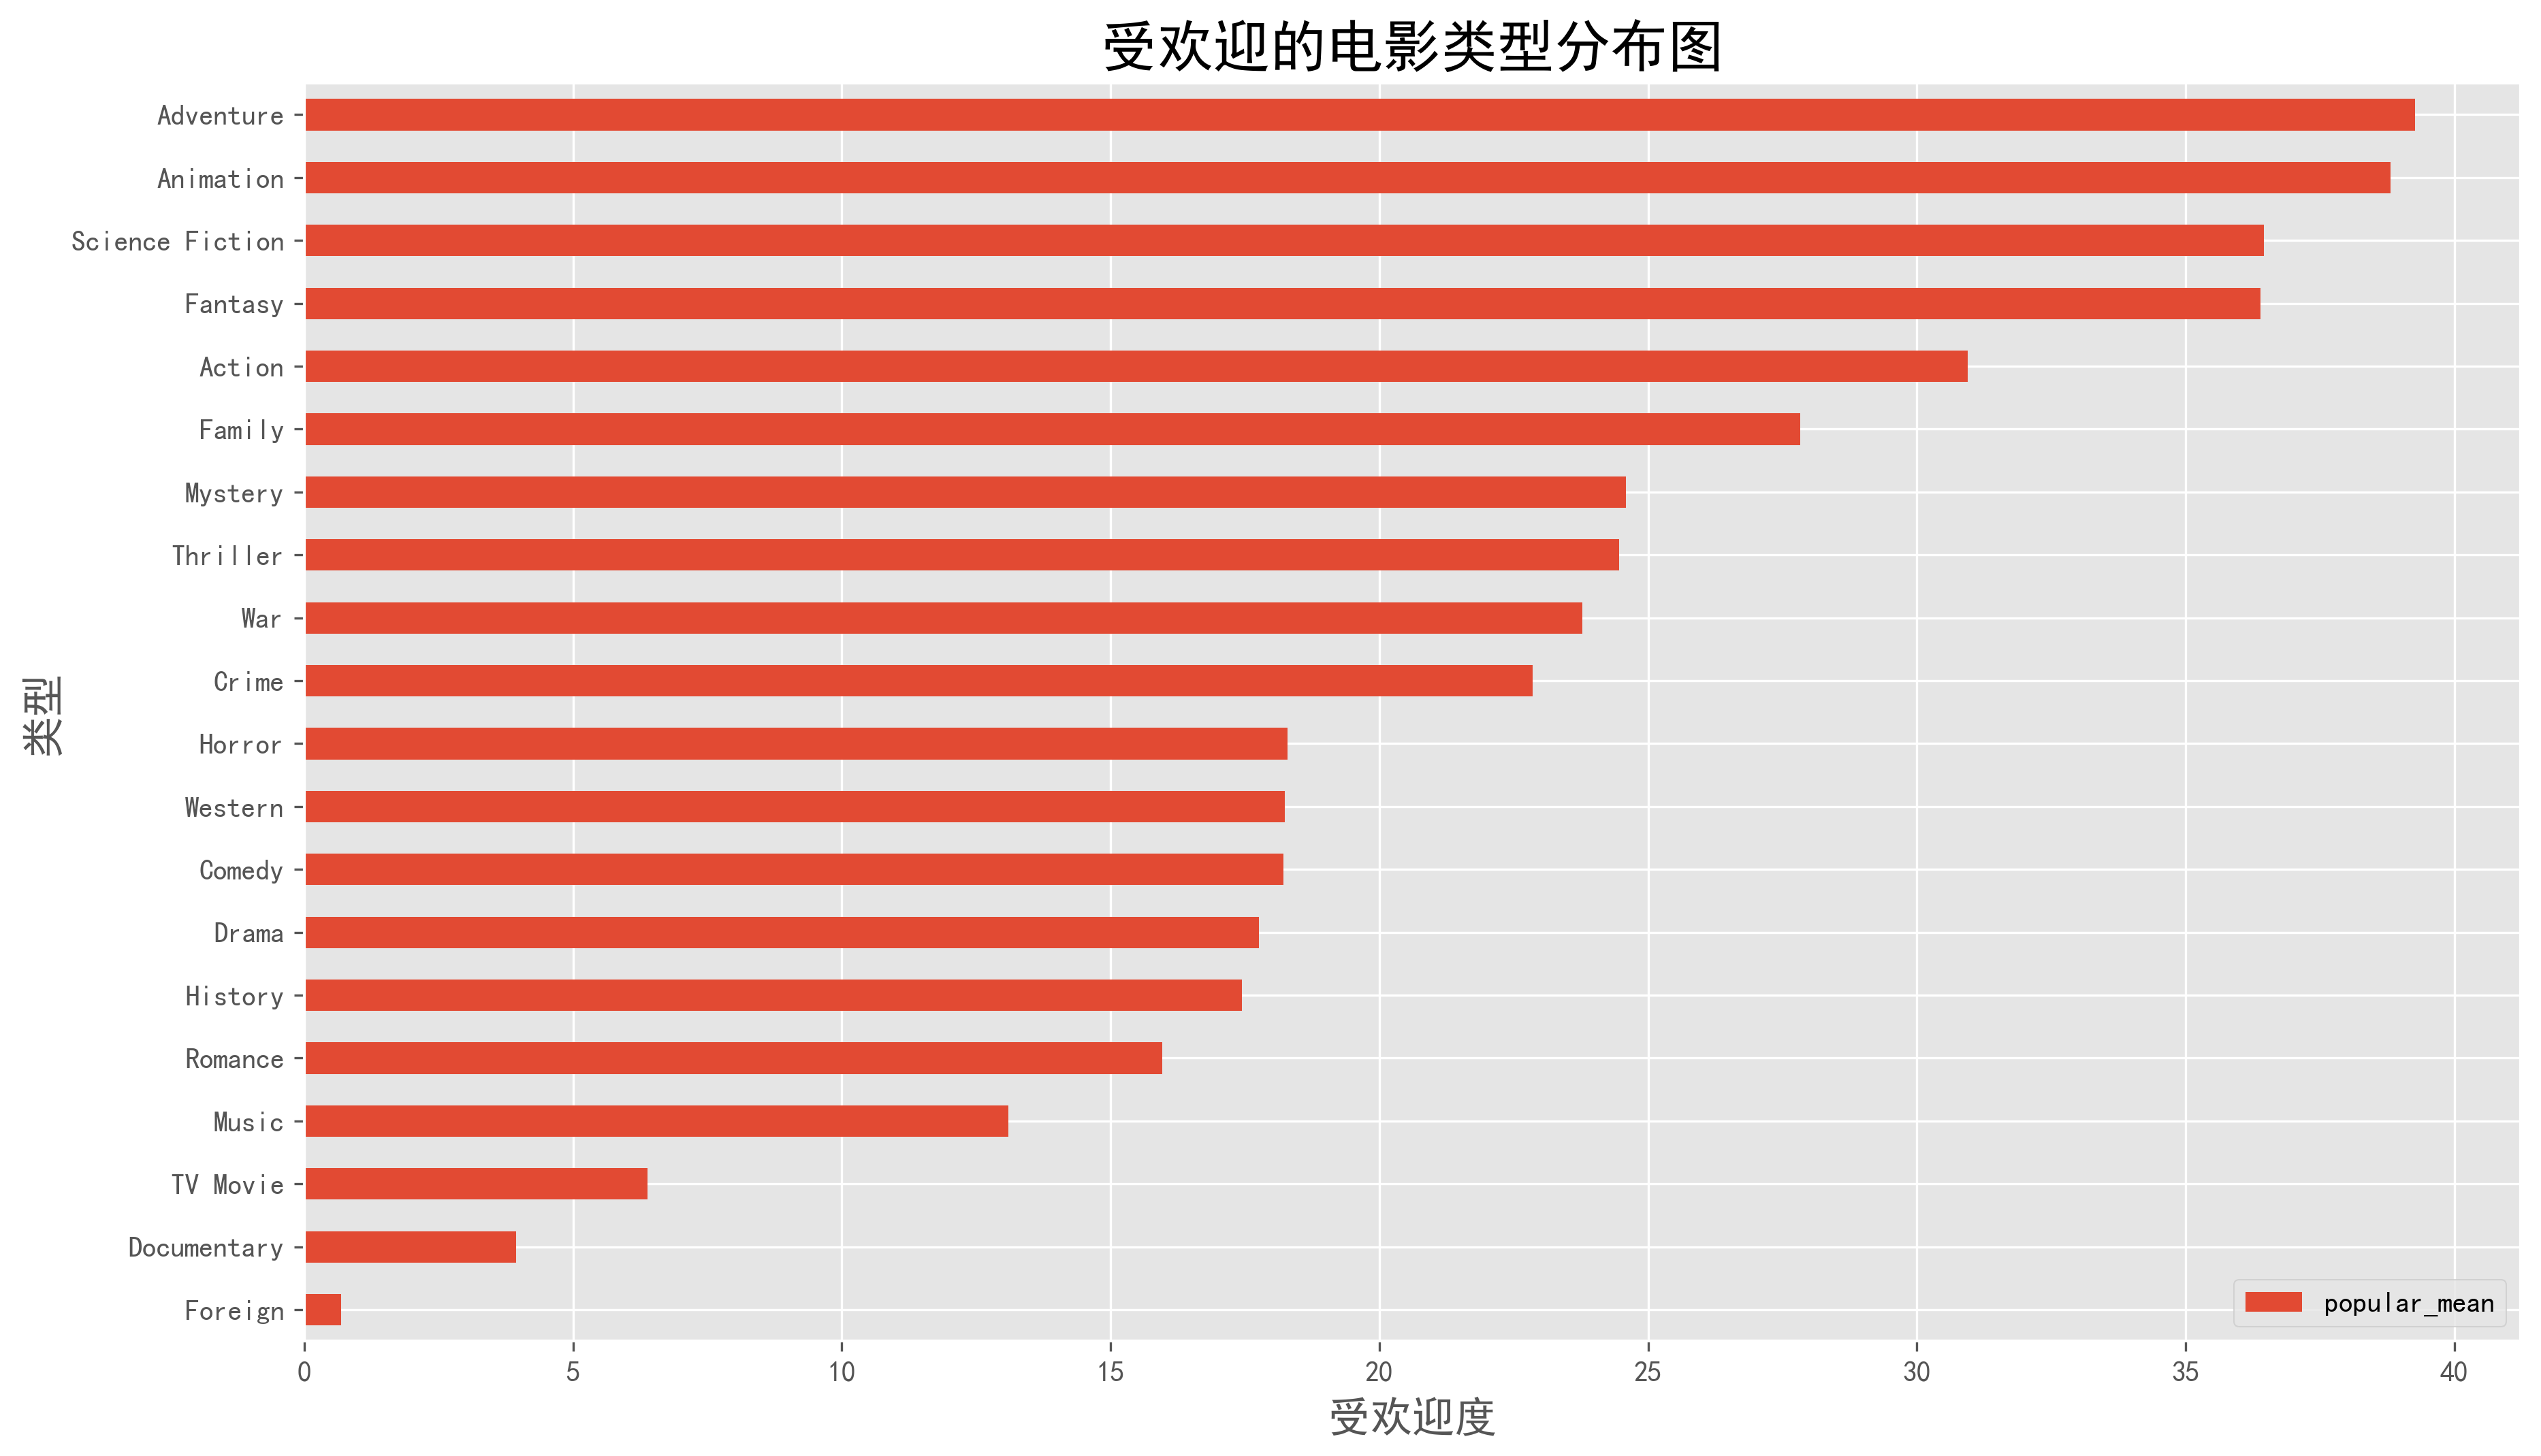

In [66]:
#绘图
popular_by_genre.sort_values(by='popular_mean').plot.barh(label='genre',figsize=(14,8))
plt.rcParams['figure.dpi']=300
plt.rcParams['figure.dpi']=300
plt.title('受欢迎的电影类型分布图',fontsize=20)
plt.xlabel('受欢迎度',fontsize=15)
plt.ylabel('类型',fontsize=15)
plt.savefig('picture/受欢迎的电影类型分布图.png',transparent=True)

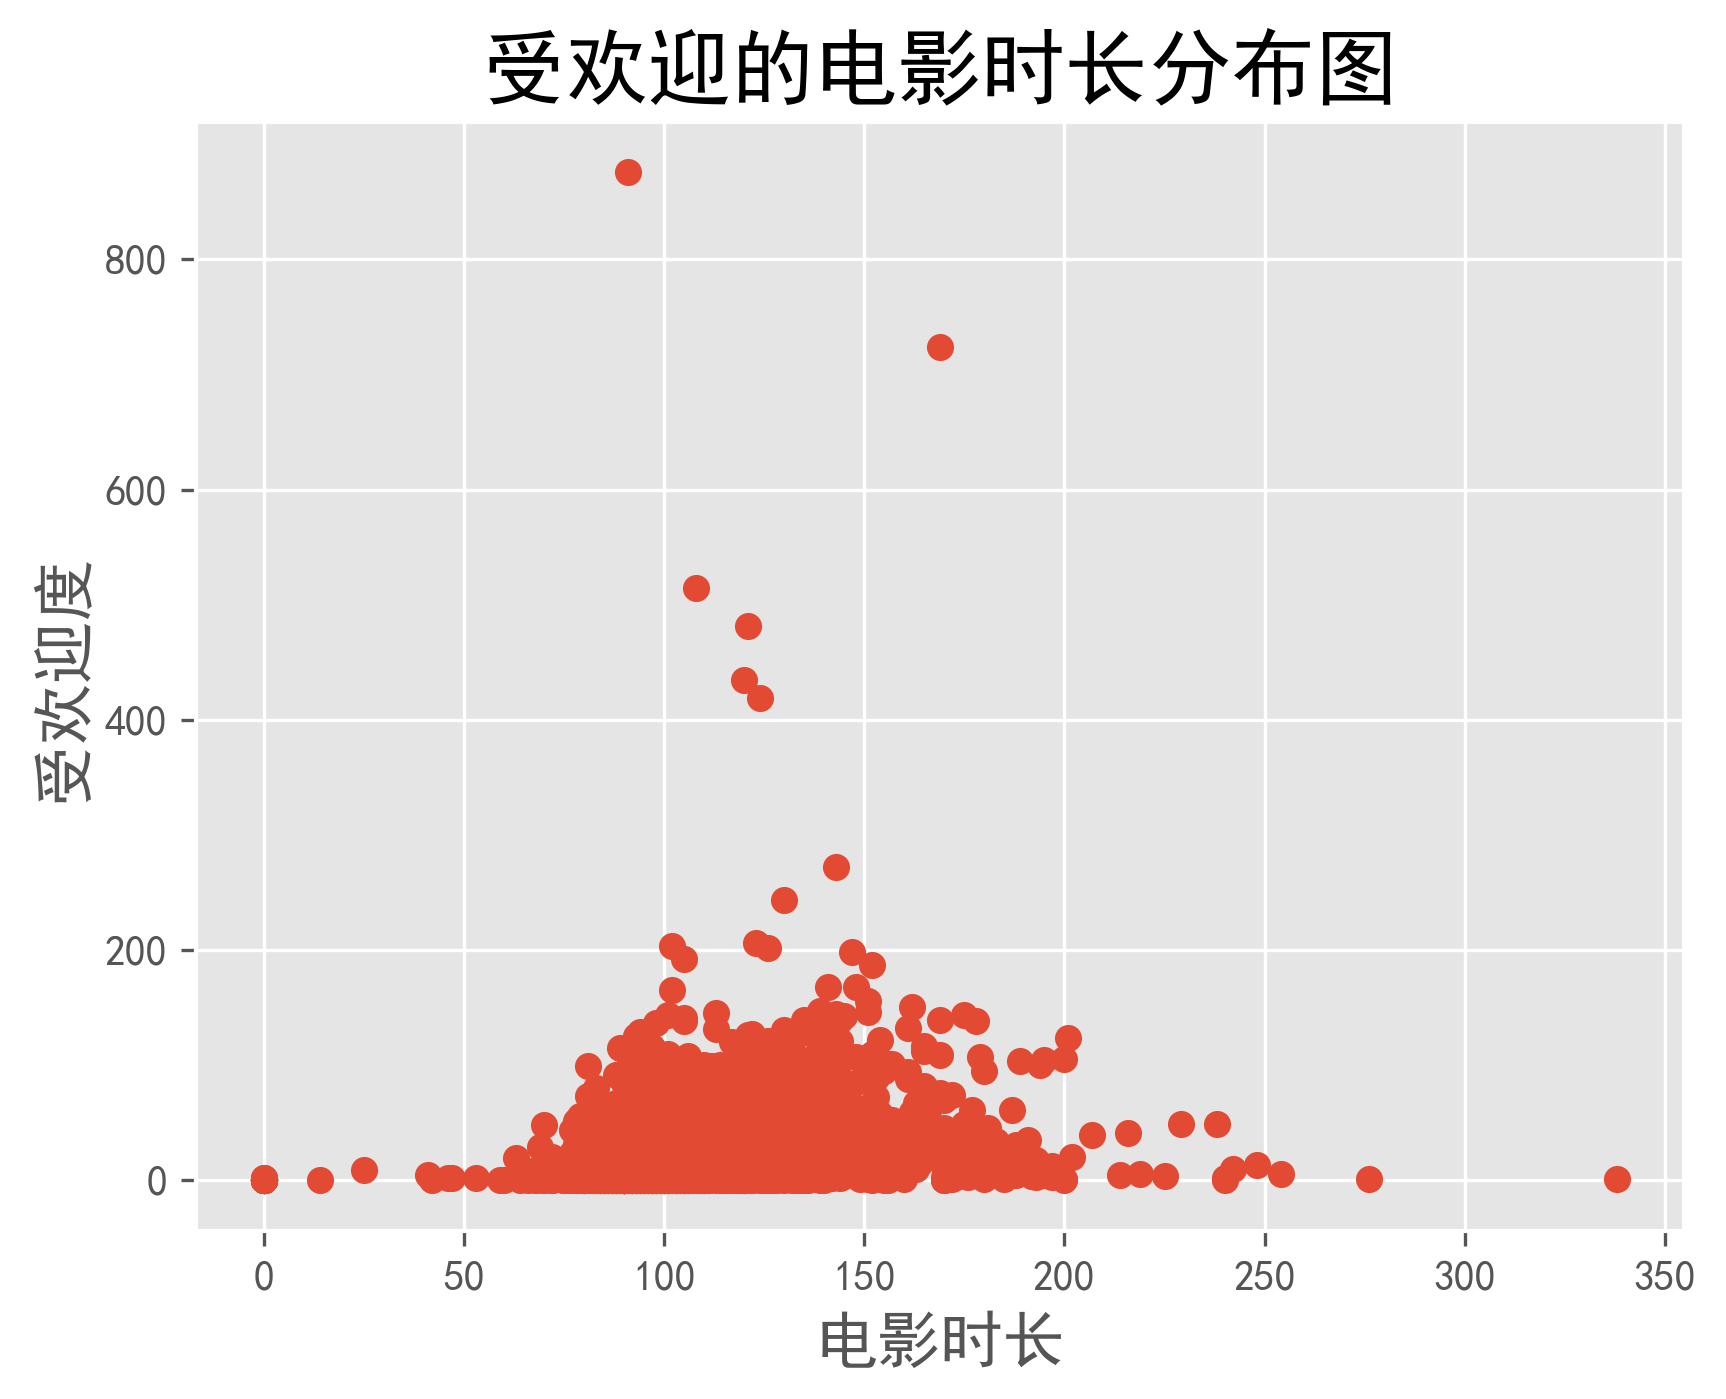

In [69]:
#电影时长与受欢迎度
plt.scatter(total.runtime,total.popularity)
plt.title('受欢迎的电影时长分布图',fontsize=20)
plt.ylabel('受欢迎度',fontsize=15)
plt.xlabel('电影时长',fontsize=15)
plt.savefig('picture/受欢迎的电影时长分布图.png',transparent=True)

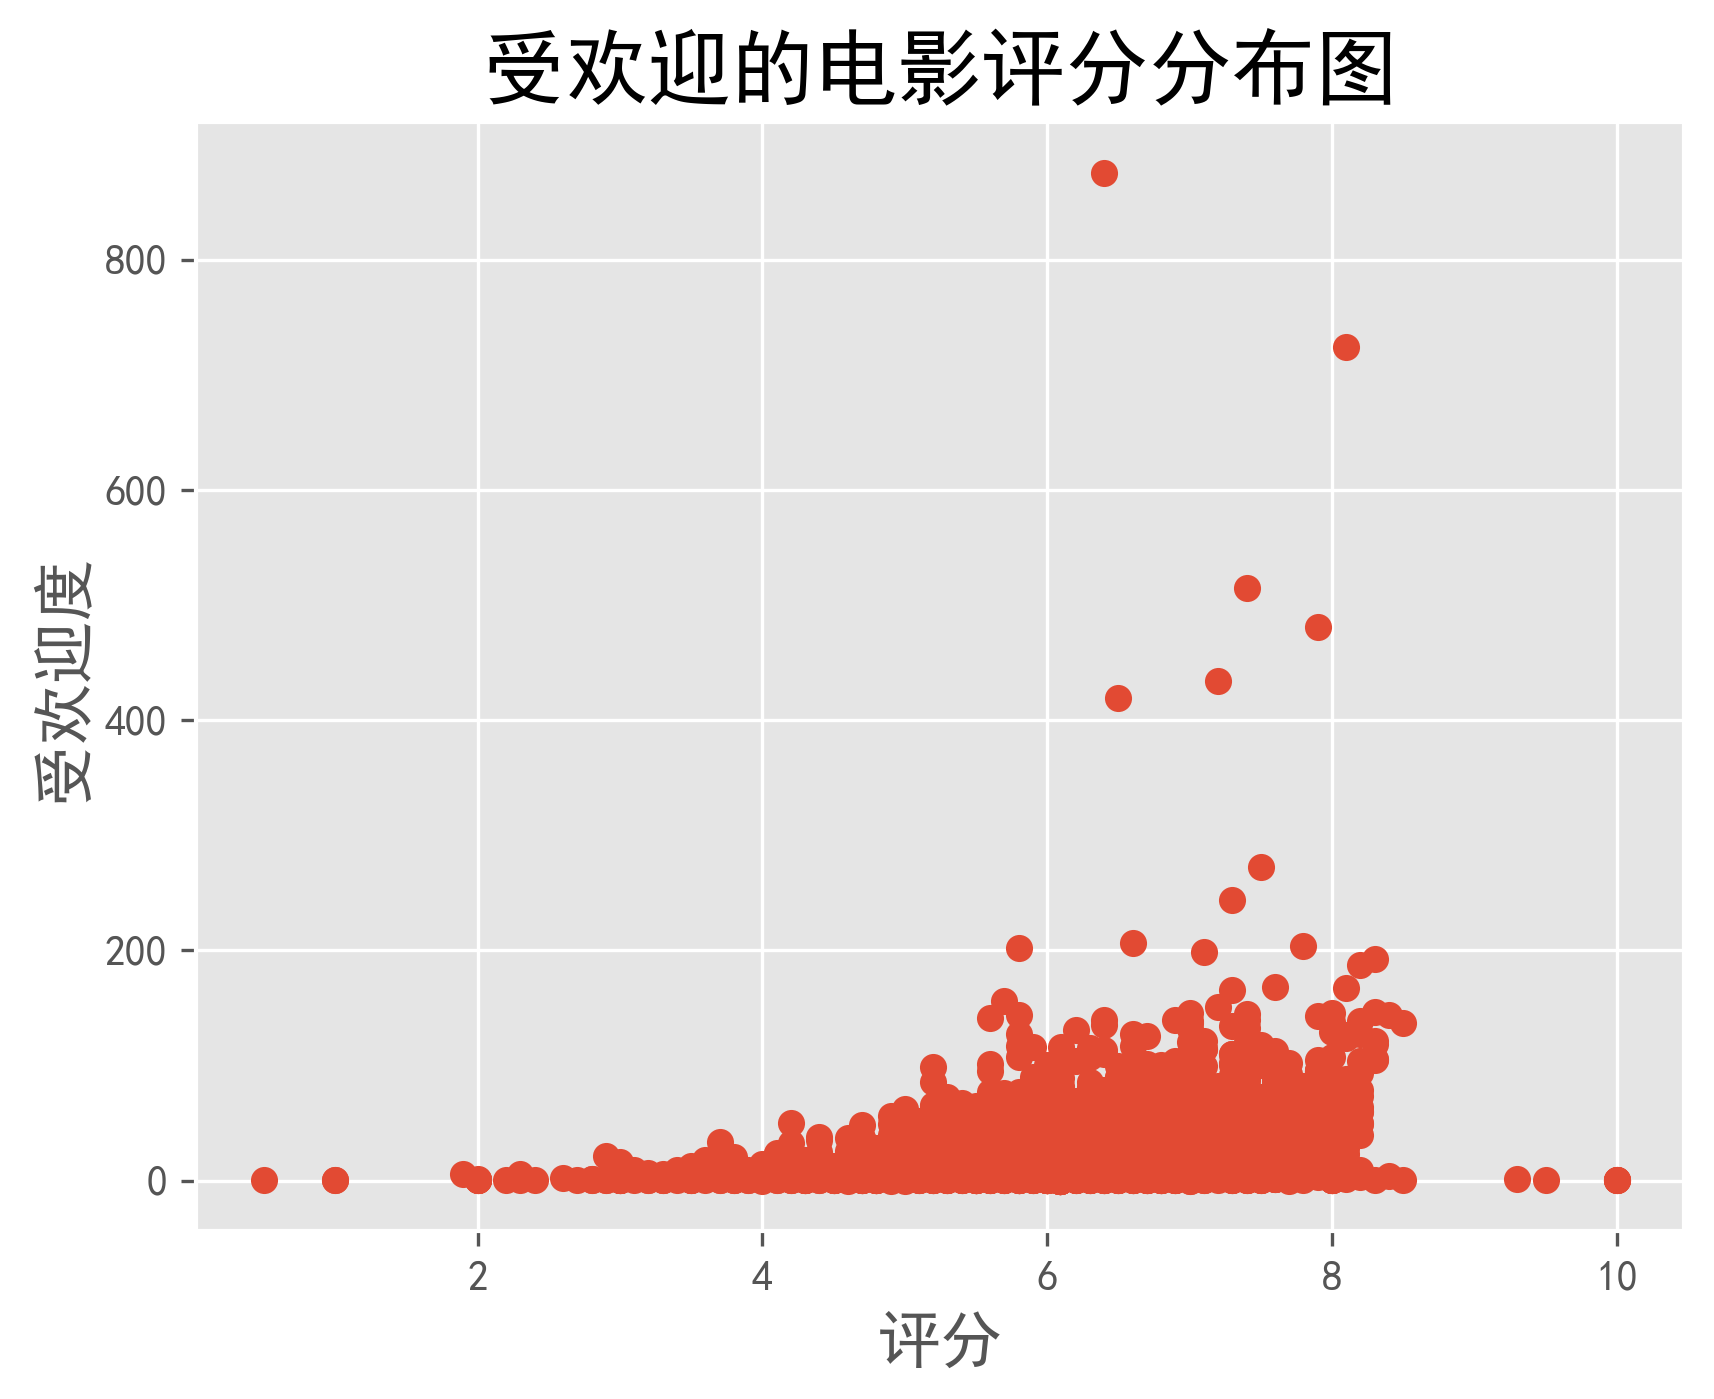

In [71]:
#电影评分与受欢迎度
plt.scatter(total.vote_average,total.popularity)
plt.title('受欢迎的电影评分分布图',fontsize=20)
plt.ylabel('受欢迎度',fontsize=15)
plt.xlabel('评分',fontsize=15)
plt.savefig('picture/受欢迎的电影评分分布图.png',transparent=True)

In [72]:
##Universal Pictures与Paramount Pictures两家巨头公司的业绩如何

In [115]:
company_list=['Universal Pictures','Paramount Pictures']
company_df=pd.DataFrame()
for company in company_list:
    company_df[company]=total.production_companies.str.contains(company).map(lambda x:1 if x else 0)
company_df=pd.concat([company_df,genre_df.iloc[:,:-1],total.profit],axis=1)
company_df.head(5)

,Universal Pictures,Paramount Pictures,Family,Foreign,Music,Documentary,Adventure,Animation,Crime,Thriller,...,Drama,Mystery,Fantasy,Horror,Action,Romance,TV Movie,Comedy,Science Fiction,profit
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,2.550965e+09
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,6.610000e+08
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,6.356746e+08
3,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,8.349391e+08
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,2.413910e+07


In [116]:
#利润对比
list=[]
for company in company_list:
    list.append(company_df.groupby(company,as_index=False).profit.sum().loc[1,'profit'])
company_profit = pd.DataFrame(index=company_list)
company_profit['profit_total']=list
company_profit

,profit_total
Universal Pictures,3.137083e+10
Paramount Pictures,2.978487e+10


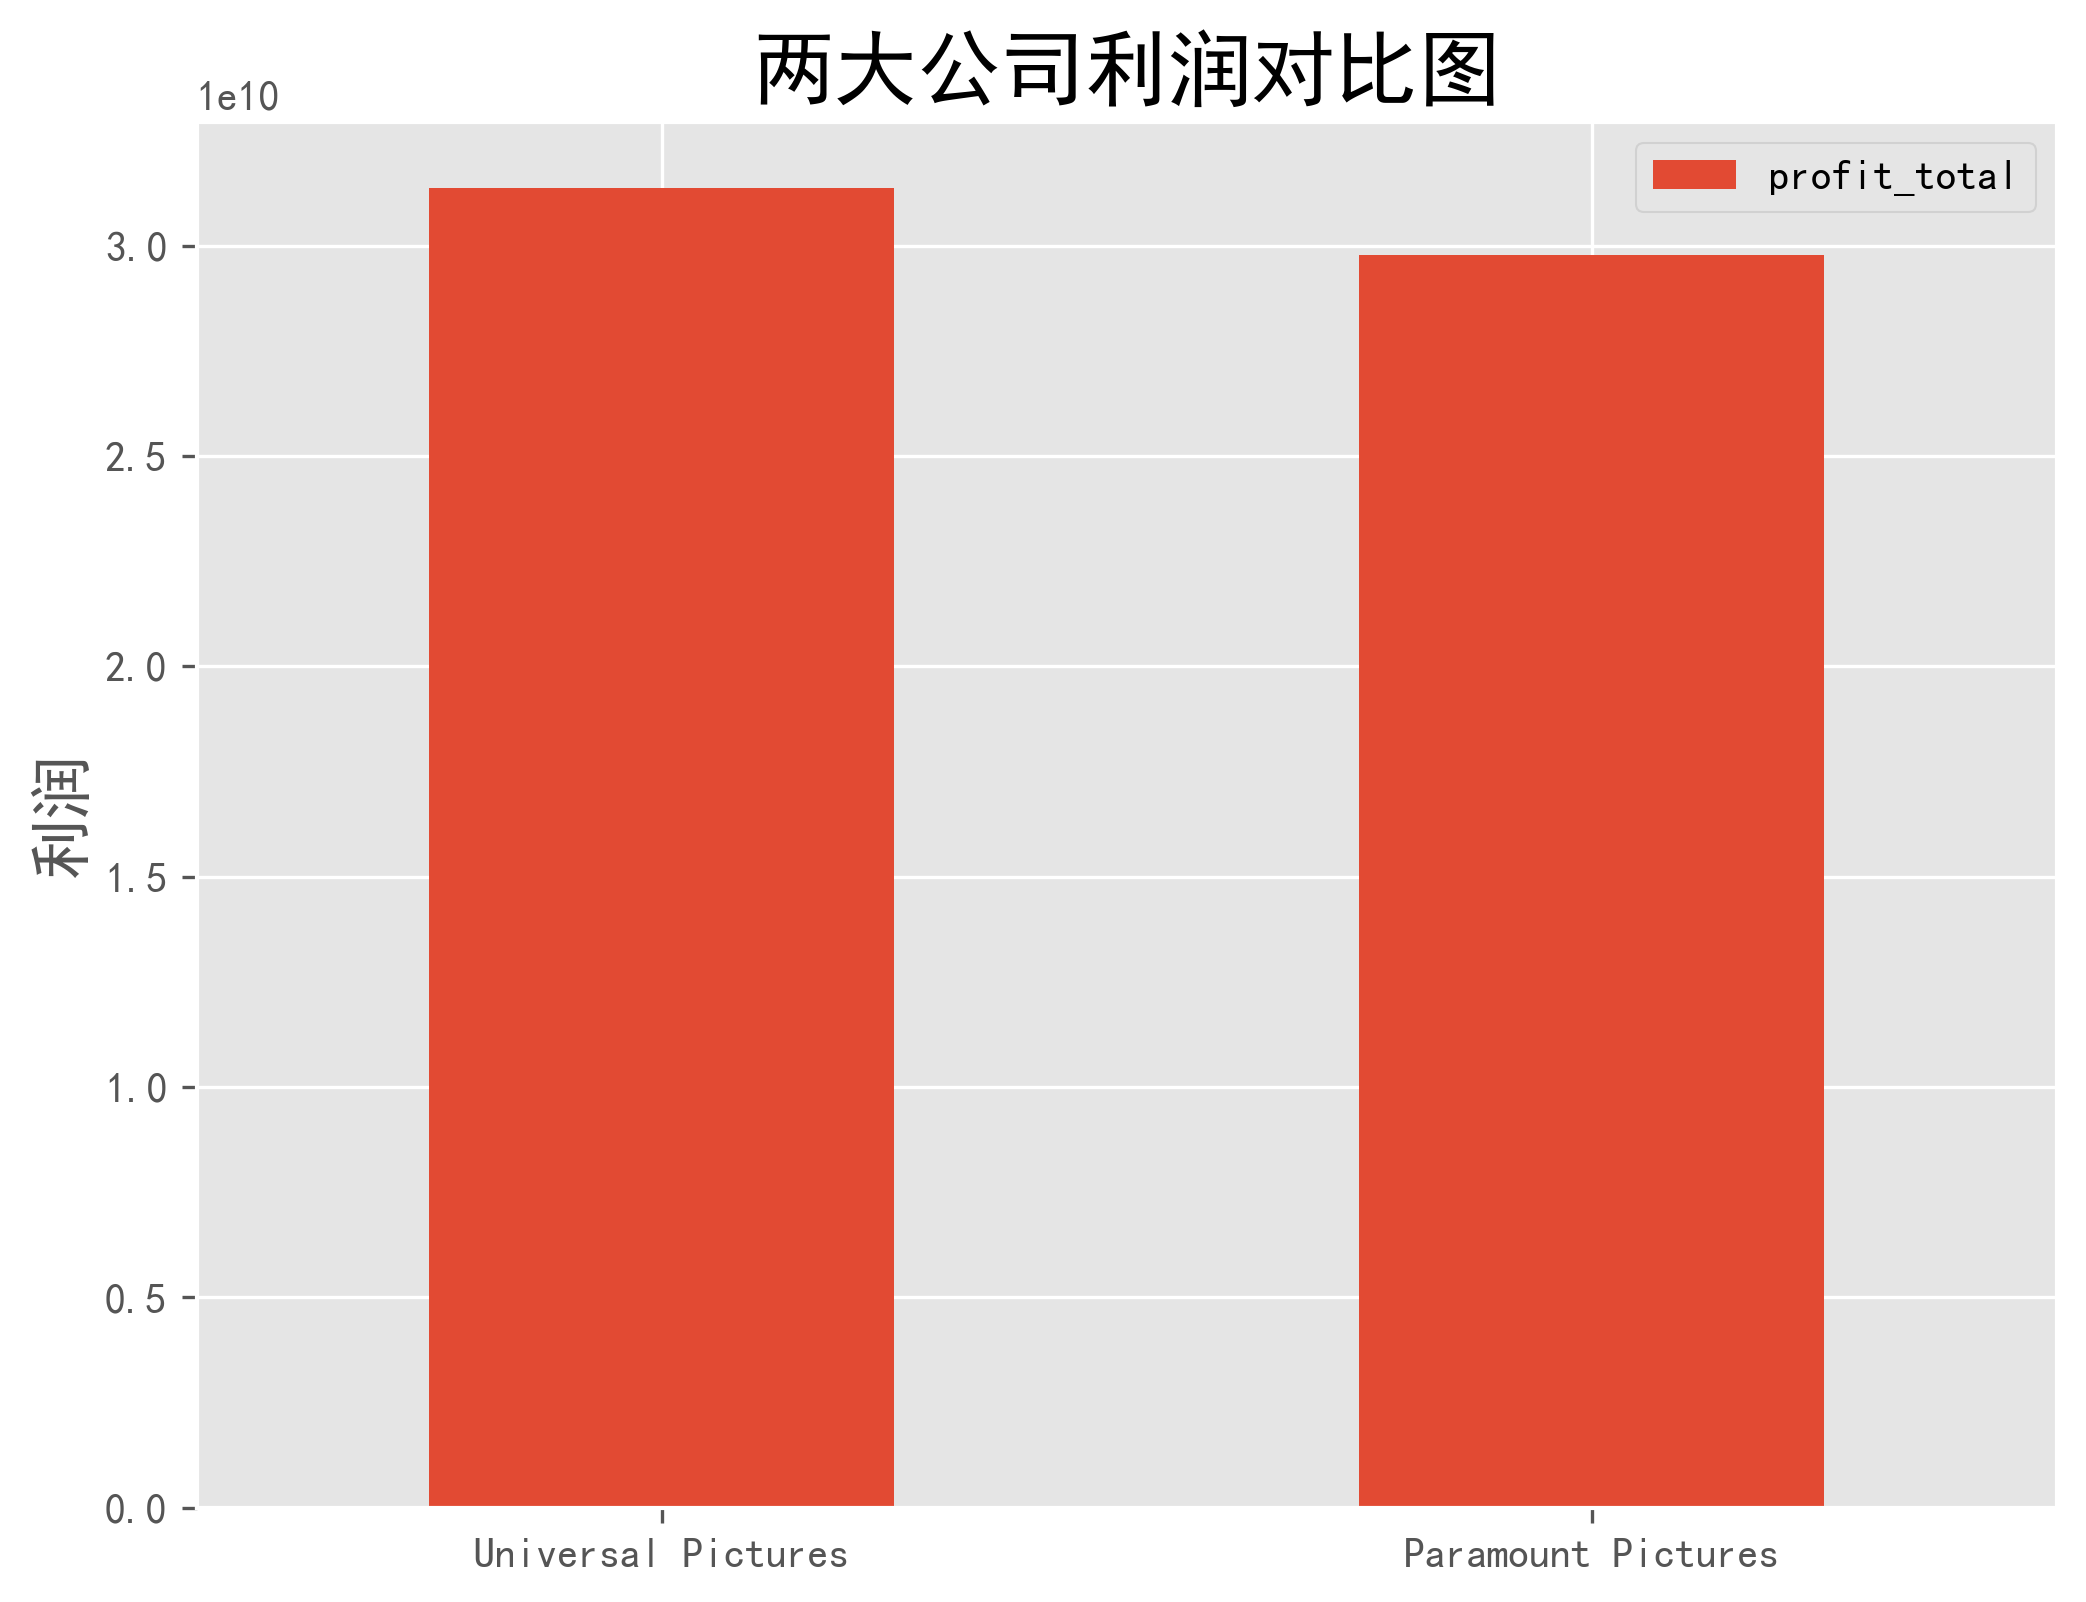

In [117]:
#绘图
company_profit.plot.bar(label=company_profit.index,figsize=(8,6))
plt.title('两大公司利润对比图',fontsize=20)
plt.xticks(rotation=0)
plt.ylabel('利润',fontsize=15)
plt.savefig('picture/两大公司利润对比图.png',transparent=True)

In [118]:
#出品的电影类型对比
company_list=['Universal Pictures','Paramount Pictures']
company_df=pd.DataFrame()
for company in company_list:
    company_df[company]=total.production_companies.str.contains(company).map(lambda x:1 if x else 0)
company_df=pd.concat([company_df,genre_df.iloc[:,:-1]],axis=1)
company_df.head(5)

,Universal Pictures,Paramount Pictures,Family,Foreign,Music,Documentary,Adventure,Animation,Crime,Thriller,...,War,Drama,Mystery,Fantasy,Horror,Action,Romance,TV Movie,Comedy,Science Fiction
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [120]:
#Universal各电影类型
Uni_df=company_df.loc[company_df['Universal Pictures']==1]
Uni_df=Uni_df.drop(['Universal Pictures','Paramount Pictures'],axis=1)
#取数量最多的前十种电影类型
most1=Uni_df.sum().sort_values(ascending=False)[:10]

#Paramount Pictures
par_df=company_df.loc[company_df['Paramount Pictures']==1]
par_df=par_df.drop(['Universal Pictures','Paramount Pictures'],axis=1)
#取数量最多的前十种电影类型
most2=par_df.sum().sort_values(ascending=False)[:10]

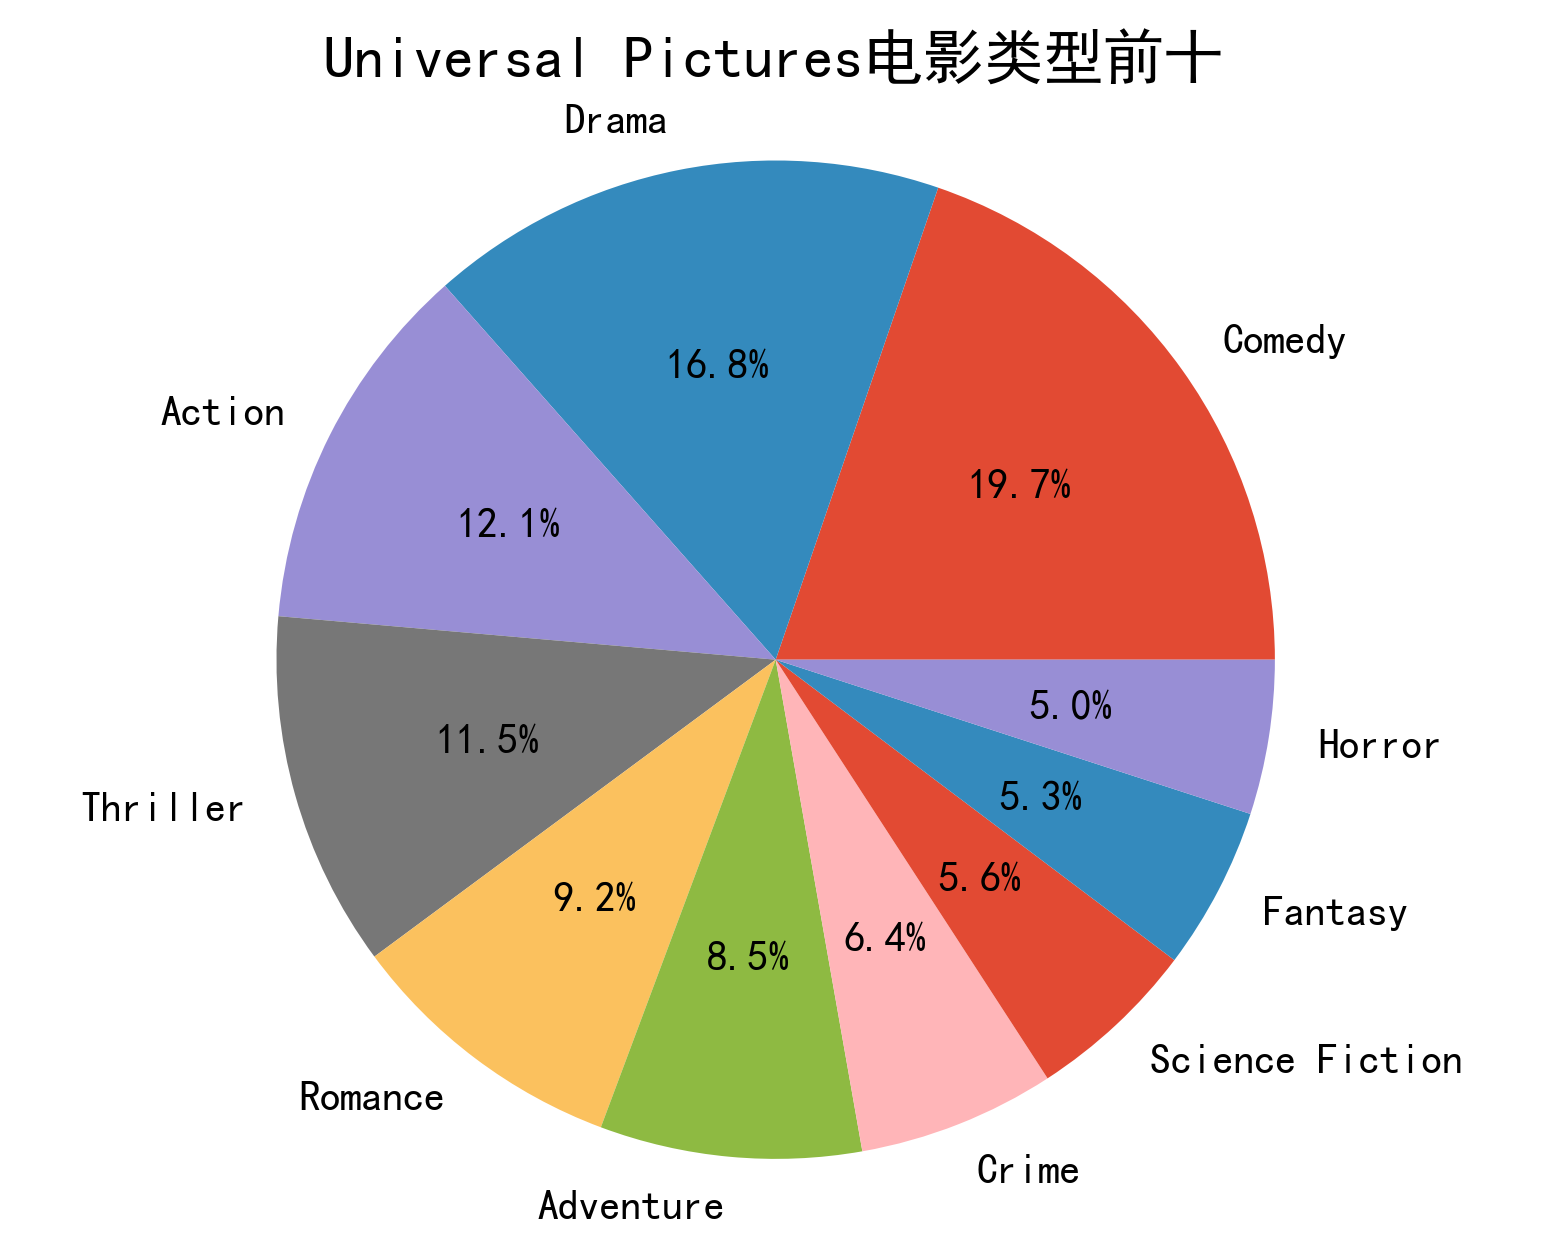

In [121]:
#绘图
plt.style.use('ggplot')
plt.pie(x=most1.tolist(),labels=most1.index.tolist(),autopct='%.1f%%')
plt.axis('equal')
plt.title('Universal Pictures电影类型前十')
plt.savefig('picture/Universal Pictures电影类型前十.png',transparent=True)

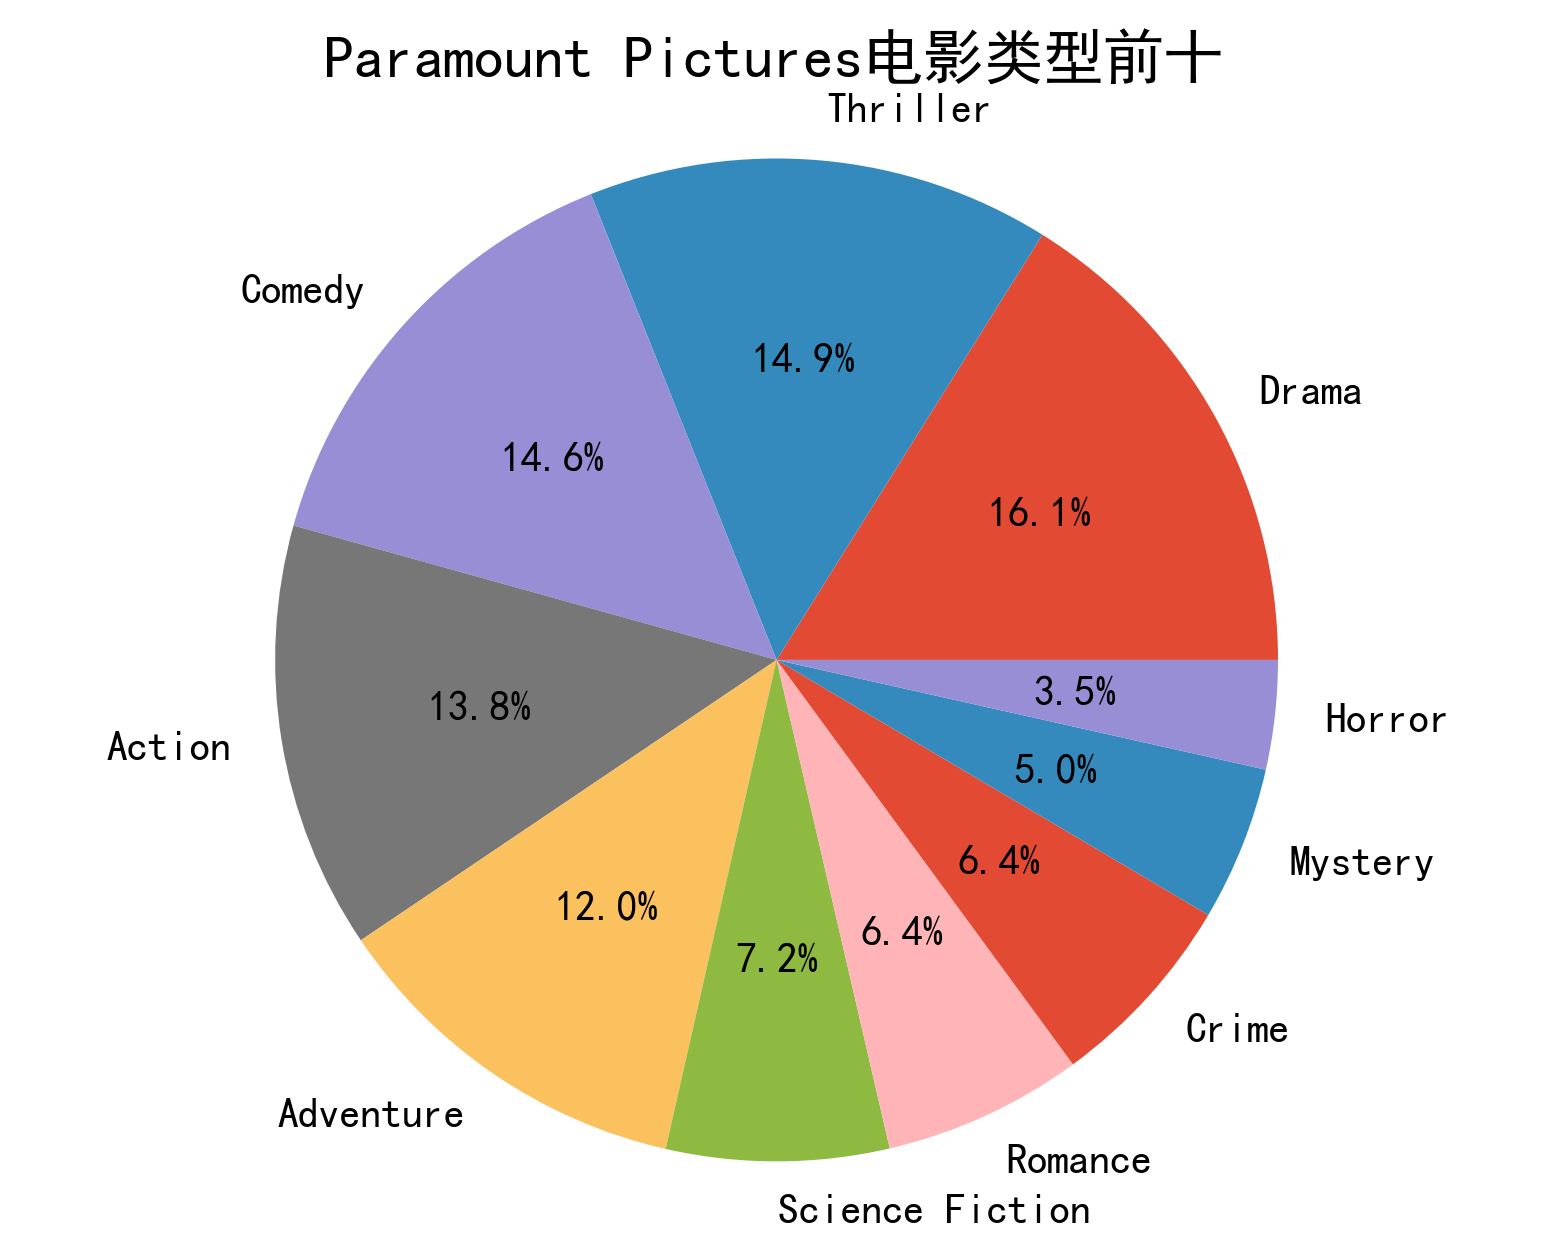

In [122]:
plt.style.use('ggplot')
plt.pie(x=most2.tolist(),labels=most2.index.tolist(),autopct='%.1f%%')
plt.axis('equal')
plt.title('Paramount Pictures电影类型前十')
plt.savefig('picture/Paramount Pictures电影类型前十.png',transparent=True)

In [127]:
#电影关键词词云图
keywords_list=[]
list1=[]
for x in total['keywords']:
    keywords_list.append(x)
    keywords_list
keywords_list=''.join(keywords_list)
#去掉字符
keywords_list=keywords_list.replace('\'s','')
keywords_list=keywords_list.replace('based on','')

In [129]:
pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     -------------------------------------- 153.1/153.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [130]:
from wordcloud import WordCloud

In [135]:
wc = WordCloud(font_path="msyh.ttc",
                         width = 1000,
                         height = 700,
                         background_color='white',
                         max_words=100)

In [137]:
wc.generate(keywords_list)

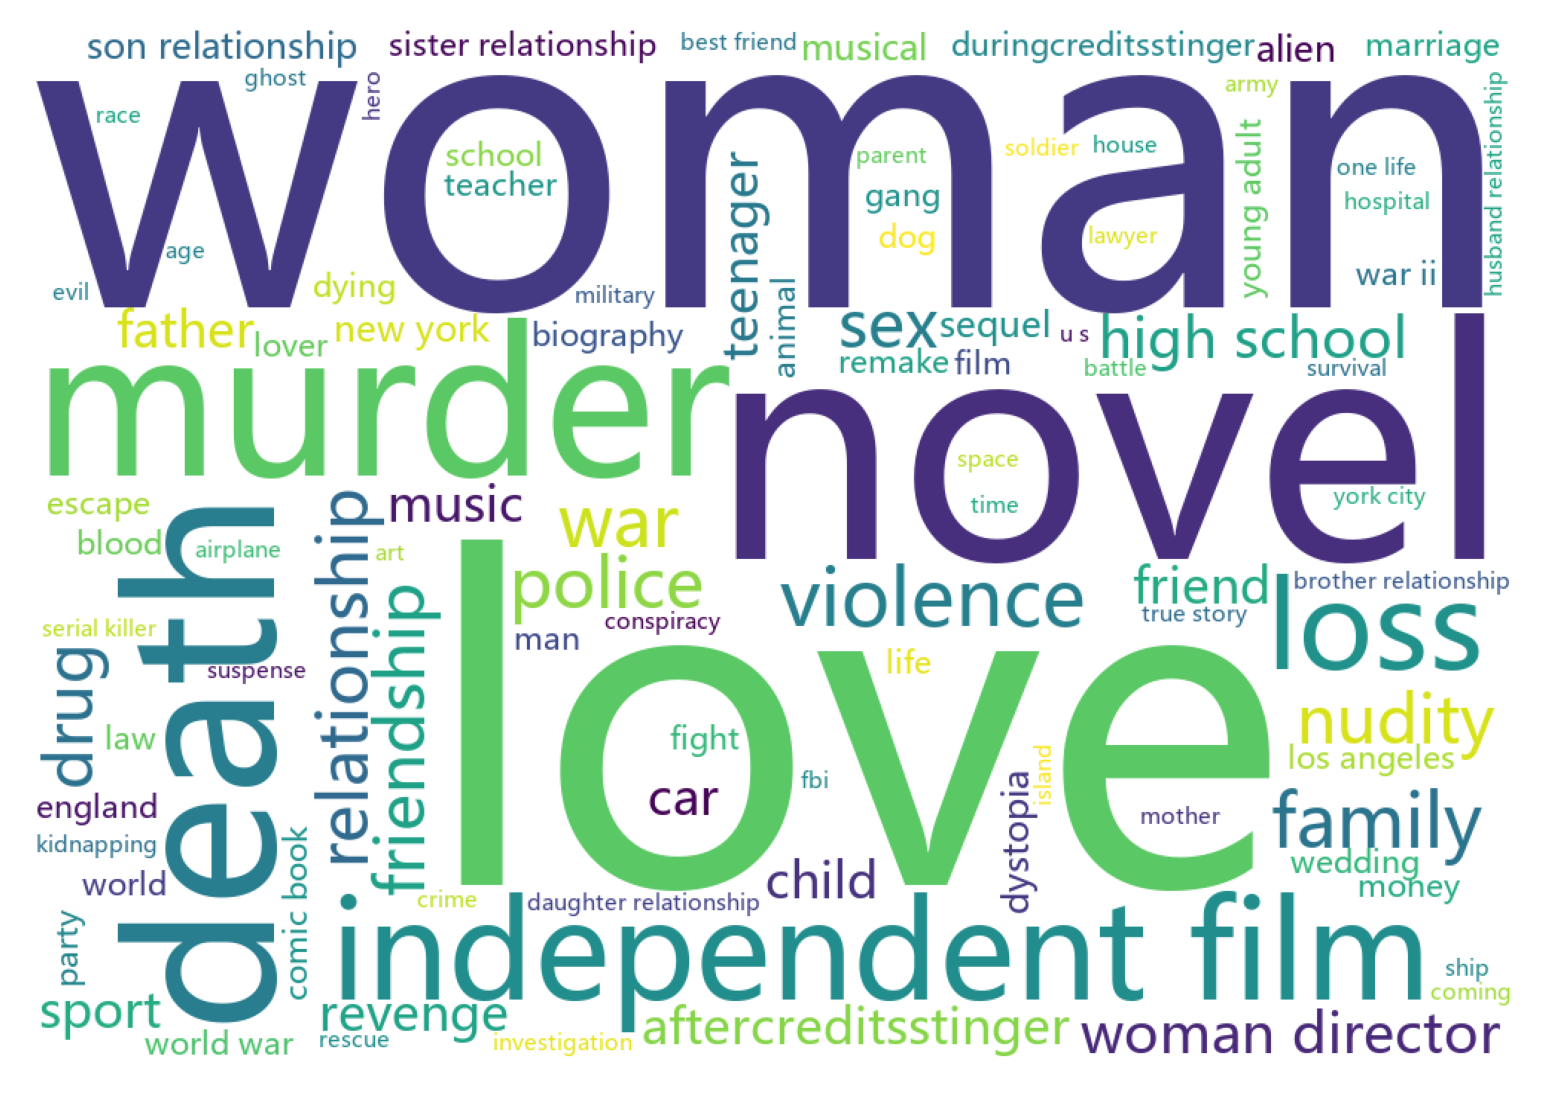

In [147]:
plt.imshow(wc)
plt.axis('off')#隐藏坐标轴
plt.show()  #显示图片
wc.to_file('picture/词云图.png')  #保存图片